In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [ ]:
# Chargement des données
df = pd.read_csv('wallstreet.csv')

In [ ]:
age_mapping = {
    '15-19 ans': '15-19',
    '20- 29 ans': '20-29',
    '30 - 39 ans': '30-39',
    '40- 49 ans': '40-49',
    '50 ans et plus': '50+'
}
df['age'] = df['Q13'].map(age_mapping)

In [ ]:
missing_ages = df['age'].isna().sum()
print(f"Valeurs manquantes pour 'age': {missing_ages}")

Valeurs manquantes pour 'age': 0


In [ ]:
print(df['age'].unique())

['40-49' '50+' '20-29' '30-39' '15-19']


In [ ]:
# Définir la matrice de coefficients
coefficients = {
    ('Femme', '15-19'): 1.70, ('Femme', '20-29'): 0.29, ('Femme', '30-39'): 0.64,
    ('Femme', '40-49'): 0.42, ('Femme', '50+'): 1.21,
    ('Homme', '15-19'): 2.31, ('Homme', '20-29'): 0.39, ('Homme', '30-39'): 0.87,
    ('Homme', '40-49'): 0.57, ('Homme', '50+'): 1.65
}

In [ ]:
df['gender'] = df['Q12']

In [ ]:
missing_ages = df['gender'].isna().sum()
print(f"Valeurs manquantes pour 'gender': {missing_ages}")

Valeurs manquantes pour 'gender': 0


In [ ]:
# Ajouter une colonne de pondération à df
def get_coefficient(row):
    return coefficients[(row['gender'], row['age'])]

df['weight'] = df.apply(get_coefficient, axis=1)

In [ ]:
# Supprimer les colonnes 'gender' et 'age' pour éviter la duplication
df = df.drop(columns=['gender', 'age'])

In [ ]:
original_df = df.copy()

In [ ]:
# Vérifiez les premières lignes pour vous assurer que la pondération est correcte
print(df.head())

                                                  Q1  Q2  \
0  Faire des affaires avec des entreprises à l'in...   4   
1                                                NaN   4   
2  Voyager pour tourisme dans un pays anglophone ...   2   
3      Travailler pour une multinationale en Tunisie   3   
4  Étudier dans un pays anglophone (même en deuxi...   4   

                                         Q3   Q4           Q5  \
0  Pendant mes études (lycée et université)  Non          Non   
1                                       NaN  Non  Peut Être !   
2  Pendant mes études (lycée et université)  Oui          Non   
3               Cours et formations privées  Oui          Oui   
4  Pendant mes études (lycée et université)  Oui  Peut Être !   

                                                  Q6  \
0  Votre lieu de travail, Les Aéroports, Les Hôte...   
1                                                NaN   
2           Les Aéroports, Les Hôtels (à l'étranger)   
3   Votre lieu de travai

In [ ]:
# Encodage des réponses textuelles
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [ ]:
# Standardiser les données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
# Méthode du coude pour K-means
wcss = []
silhouette_scores = []
range_n_clusters = range(2, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data, sample_weight=df['weight'])
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

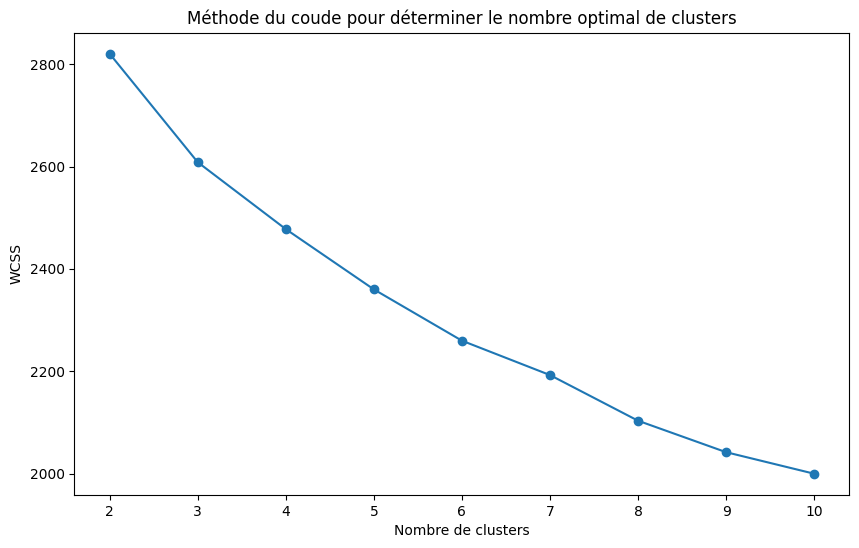

In [ ]:
# Tracer la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, wcss, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

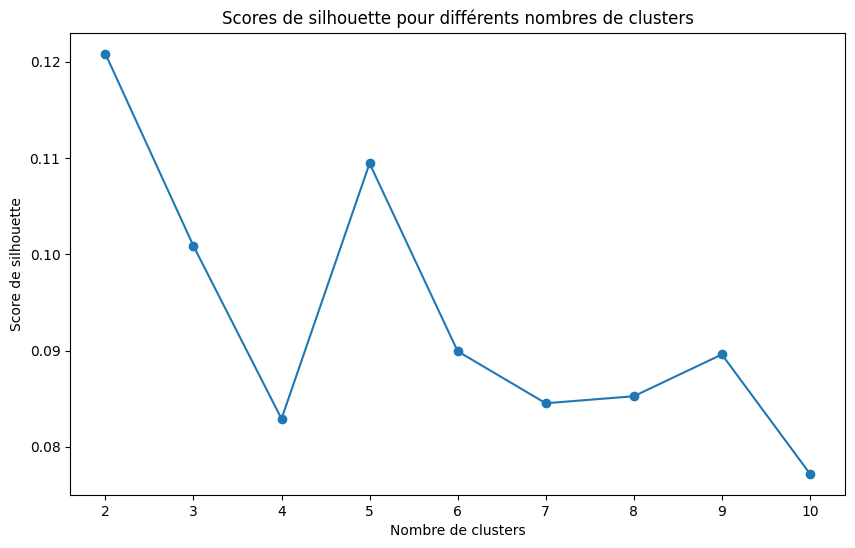

In [ ]:
# Tracer les scores de silhouette
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Scores de silhouette pour différents nombres de clusters')
plt.show()

In [ ]:
# En se basant sur les graphiques, on peut choisir le nombre optimal de clusters, par exemple 2
optimal_clusters = 3

In [ ]:
# K-means clustering avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data, sample_weight=df['weight'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Agglomerative Clustering avec le nombre optimal de clusters
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
agg_labels = agg_clustering.fit_predict(scaled_data)

In [ ]:
# Réduction de dimension avec PCA pour visualisation
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [ ]:
# Fonction pour visualiser les clusters
def plot_clusters(data, labels, title):
    plt.figure(figsize=(10, 6))
    unique_labels = set(labels)
    for label in unique_labels:
        if label == -1:
            # Cluster bruit pour DBSCAN
            plt.scatter(data[labels == label, 0], data[labels == label, 1], label='Noise', s=50, c='black')
        else:
            plt.scatter(data[labels == label, 0], data[labels == label, 1], label=f'Cluster {label}', s=50)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title(title)
    plt.legend()
    plt.show()

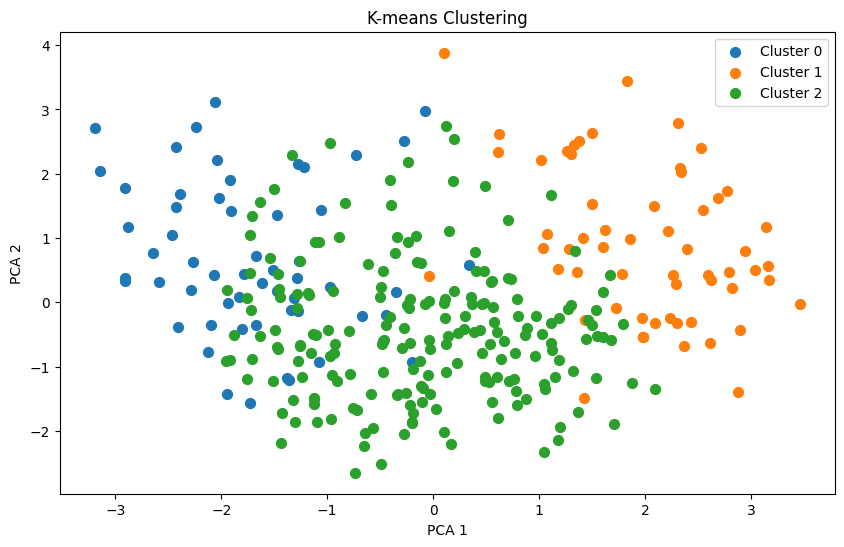

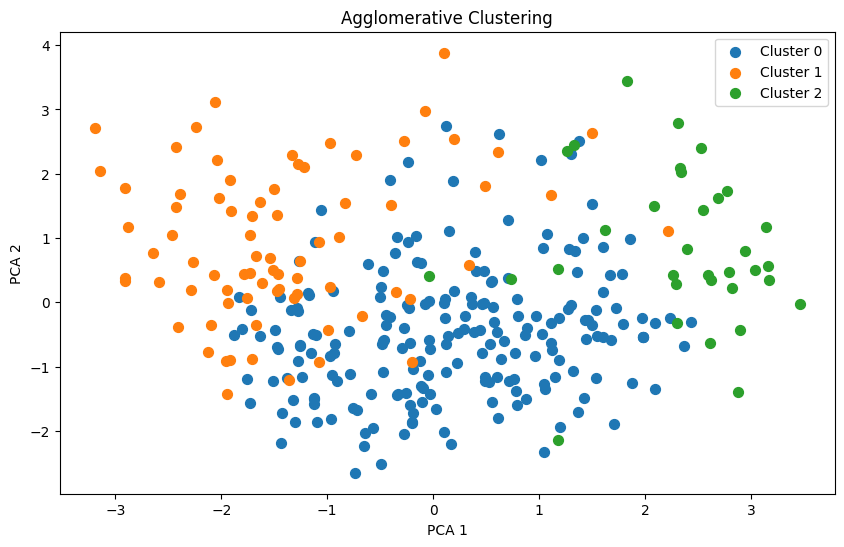

In [ ]:
# Visualisation des clusters
plot_clusters(pca_data, kmeans_labels, 'K-means Clustering')
plot_clusters(pca_data, agg_labels, 'Agglomerative Clustering')

In [ ]:
# Analyser les résultats des différents clustering
def analyze_clusters(labels):
    unique_labels = set(labels)
    cluster_info = {}
    for label in unique_labels:
        cluster_size = sum(labels == label)
        cluster_info[label] = cluster_size
    return cluster_info

In [ ]:
# Comparaison des clusters avec d'autres méthodes
# Calculer le score silhouette pour chaque méthode
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
agg_silhouette = silhouette_score(scaled_data, agg_labels)

print(f"K-means Silhouette Score: {kmeans_silhouette}")
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette}")

K-means Silhouette Score: 0.10086410427832819
Agglomerative Clustering Silhouette Score: 0.08331760509594478


In [ ]:
# Calculer l'indice de Davies-Bouldin pour chaque méthode
kmeans_db = davies_bouldin_score(scaled_data, kmeans_labels)
agg_db = davies_bouldin_score(scaled_data, agg_labels)

print(f"K-means Davies-Bouldin Index: {kmeans_db}")
print(f"Agglomerative Clustering Davies-Bouldin Index: {agg_db}")


K-means Davies-Bouldin Index: 2.6045343379854415
Agglomerative Clustering Davies-Bouldin Index: 2.761886060305464


In [ ]:
# Calculer l'indice de Calinski-Harabasz pour chaque méthode
kmeans_ch = calinski_harabasz_score(scaled_data, kmeans_labels)
agg_ch = calinski_harabasz_score(scaled_data, agg_labels)

print(f"K-means Calinski-Harabasz Index: {kmeans_ch}")
print(f"Agglomerative Clustering Calinski-Harabasz Index: {agg_ch}")


K-means Calinski-Harabasz Index: 28.57582977299284
Agglomerative Clustering Calinski-Harabasz Index: 23.22318583177328


In [ ]:
# Profilage des clusters
# Création des DataFrames pour chaque cluster
kmeans_cluster_0 = df[kmeans_labels == 0]
kmeans_cluster_1 = df[kmeans_labels == 1]
kmeans_cluster_2 = df[kmeans_labels == 2]
agg_cluster_0 = df[agg_labels == 0]
agg_cluster_1 = df[agg_labels == 1]
agg_cluster_2 = df[agg_labels == 2]

In [ ]:
# Fonction pour analyser les réponses d'une question spécifique
def analyze_question(data, question):
    return data[question].value_counts(normalize=True) * 100

In [ ]:
# Profilage des clusters K-means
kmeans_profiles = {}
for question in df.columns:
    kmeans_profiles[question] = {
        'Cluster 0': analyze_question(kmeans_cluster_0, question),
        'Cluster 1': analyze_question(kmeans_cluster_1, question),
        'Cluster 2': analyze_question(kmeans_cluster_2, question)
    }


In [ ]:
# Profilage des clusters Agglomerative
agg_profiles = {}
for question in df.columns:
    agg_profiles[question] = {
        'Cluster 0': analyze_question(agg_cluster_0, question),
        'Cluster 1': analyze_question(agg_cluster_1, question),
        'Cluster 2': analyze_question(kmeans_cluster_2, question)
    }

In [ ]:
# Afficher le profilage des clusters pour une question donnée
def plot_cluster_profile(profiles, question):
    profile_df = pd.DataFrame(profiles[question]).fillna(0)
    profile_df.plot(kind='bar', figsize=(12, 6))
    plt.title(f'Profilage des clusters pour la question: {question}')
    plt.xlabel('Réponses')
    plt.ylabel('Pourcentage')
    plt.xticks(rotation=0)
    plt.show()

In [ ]:
# Afficher les résumés des clusters
def summarize_cluster(cluster_data):
    summary = cluster_data.describe().T
    summary['std'] = summary['std'].round(2)
    summary['mean'] = summary['mean'].round(2)
    return summary[['mean', 'std']]

print("K-means Cluster 0 Summary:")
print(summarize_cluster(kmeans_cluster_0))

print("\nK-means Cluster 1 Summary:")
print(summarize_cluster(kmeans_cluster_1))

print("\nK-means Cluster 2 Summary:")
print(summarize_cluster(kmeans_cluster_2))

print("\nAgglomerative Cluster 0 Summary:")
print(summarize_cluster(agg_cluster_0))

print("\nAgglomerative Cluster 1 Summary:")
print(summarize_cluster(agg_cluster_1))

print("\nAgglomerative Cluster 2 Summary:")
print(summarize_cluster(agg_cluster_2))

K-means Cluster 0 Summary:
         mean    std
Q1      17.37   8.45
Q2       3.44   0.82
Q3       4.19   0.52
Q4       0.91   0.93
Q5       0.39   0.73
Q6      25.19  26.09
Q7       2.82   1.77
Q8       5.67   1.61
Q9      55.60  32.41
Q10      3.70   0.76
Q11     30.88  17.60
Q12      0.37   0.49
Q13      0.93   0.59
weight   0.66   0.59

K-means Cluster 1 Summary:
         mean    std
Q1       8.95   8.81
Q2       2.58   1.02
Q3       4.19   1.37
Q4       0.75   0.73
Q5       0.83   0.72
Q6      37.90  24.90
Q7       2.00   1.54
Q8       6.10   1.49
Q9      78.25  34.12
Q10      1.68   1.04
Q11     21.37  17.10
Q12      0.53   0.50
Q13      3.98   0.13
weight   1.43   0.26

K-means Cluster 2 Summary:
         mean    std
Q1       8.06   7.24
Q2       2.51   0.93
Q3       3.65   1.25
Q4       1.11   0.69
Q5       0.89   0.69
Q6      48.09  23.89
Q7       1.96   1.38
Q8       6.27   1.39
Q9      70.13  36.24
Q10      2.14   1.50
Q11     24.31  15.80
Q12      0.40   0.49
Q13      1.80 

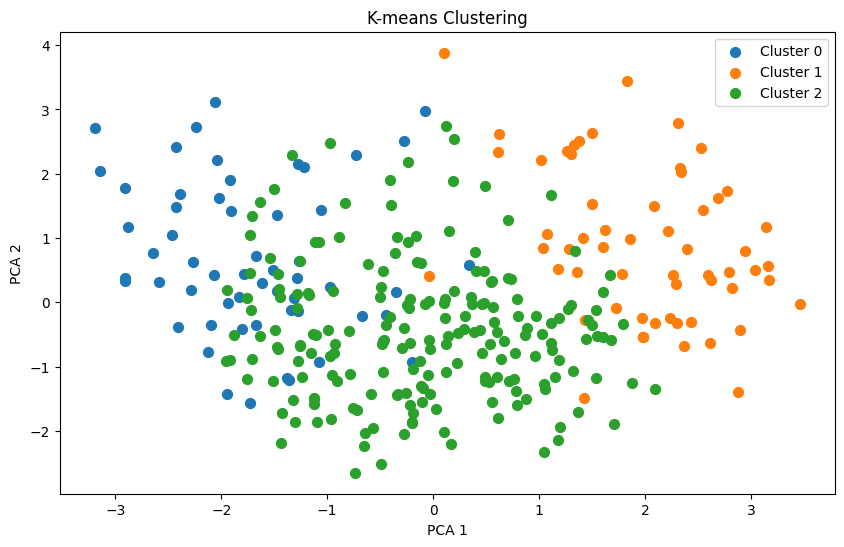

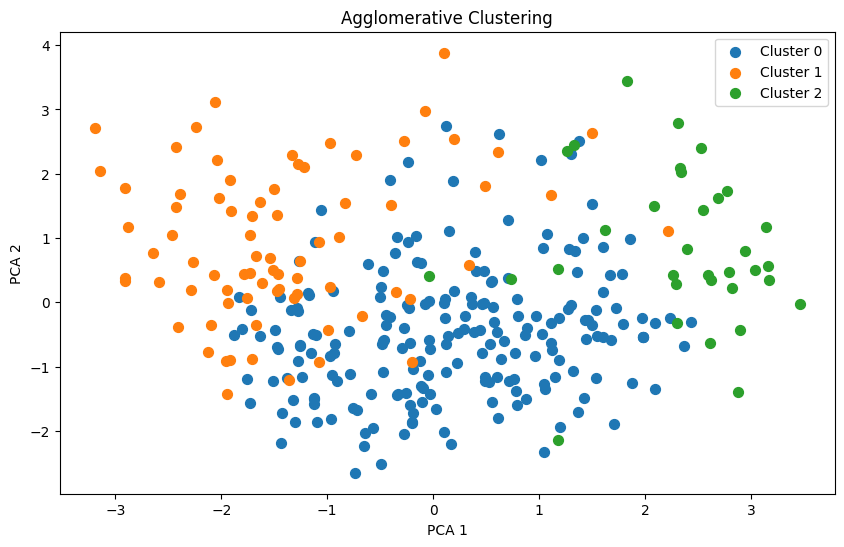

In [ ]:
# Visualisation des clusters K-means
plot_clusters(pca_data, kmeans_labels, 'K-means Clustering')

# Visualisation des clusters Agglomerative
plot_clusters(pca_data, agg_labels, 'Agglomerative Clustering')

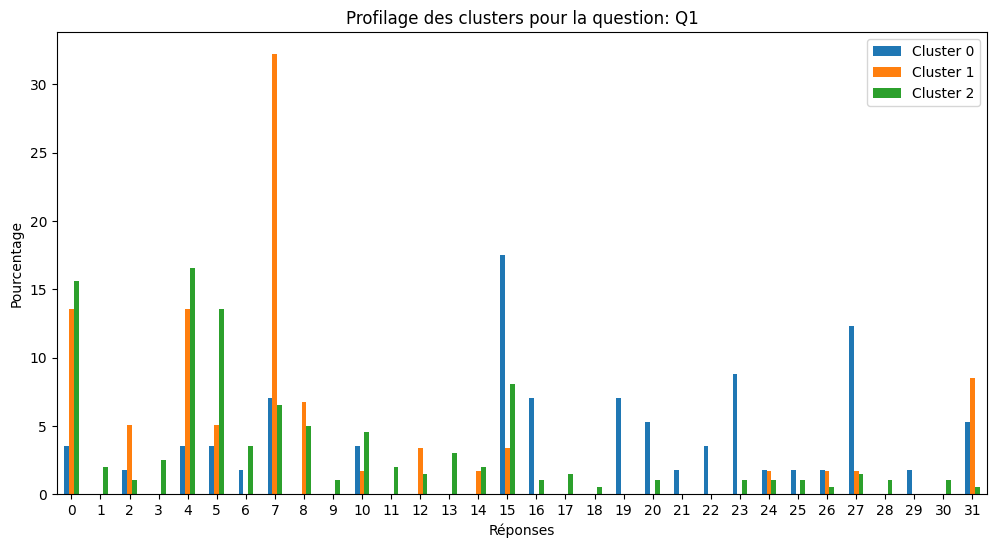

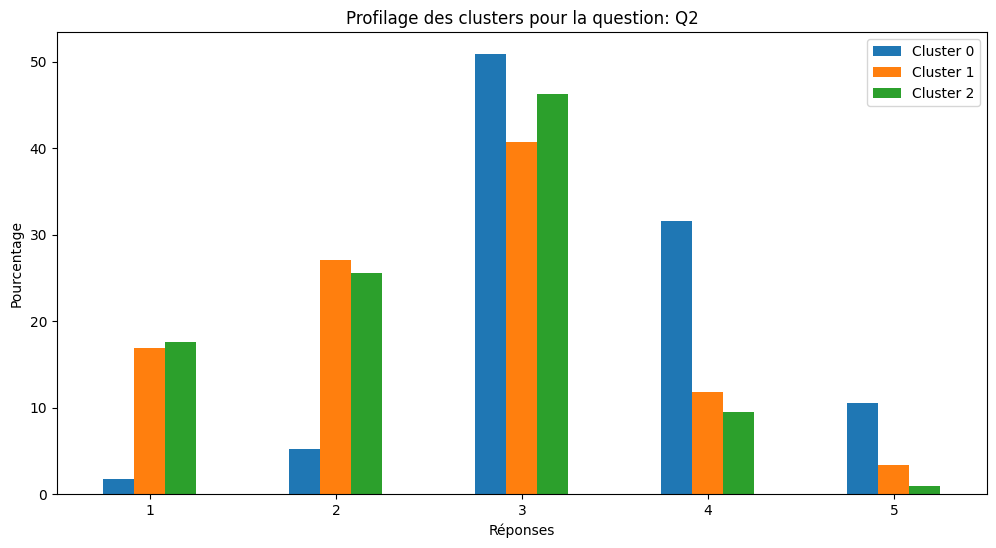

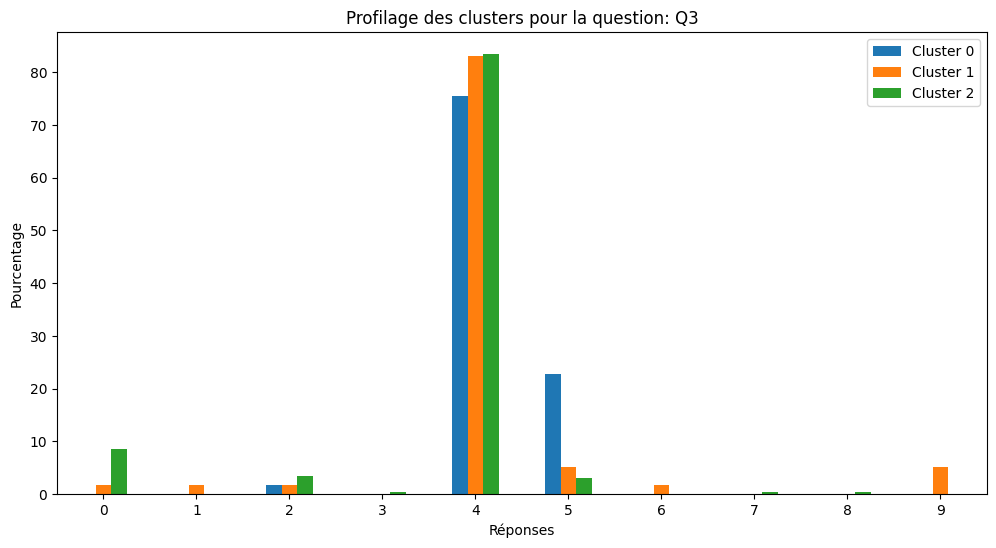

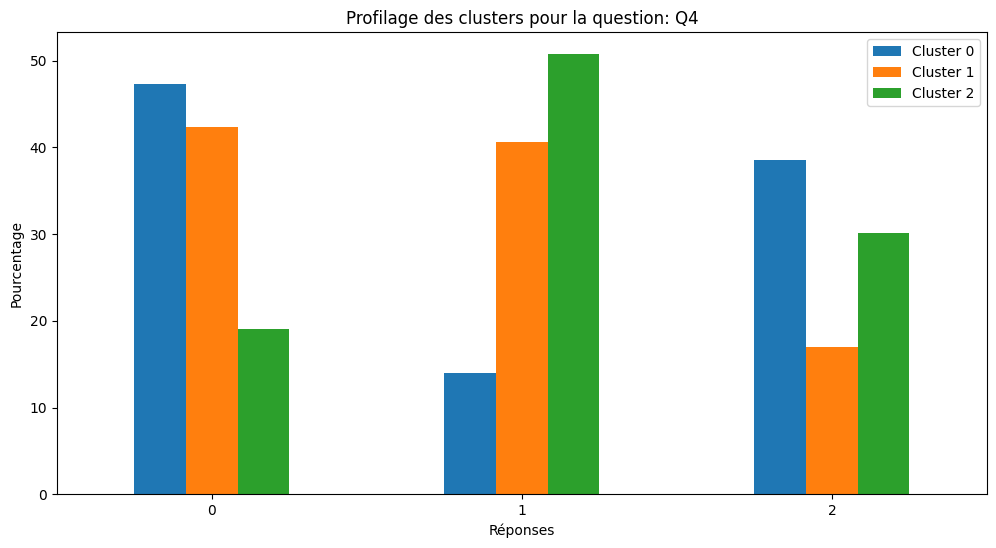

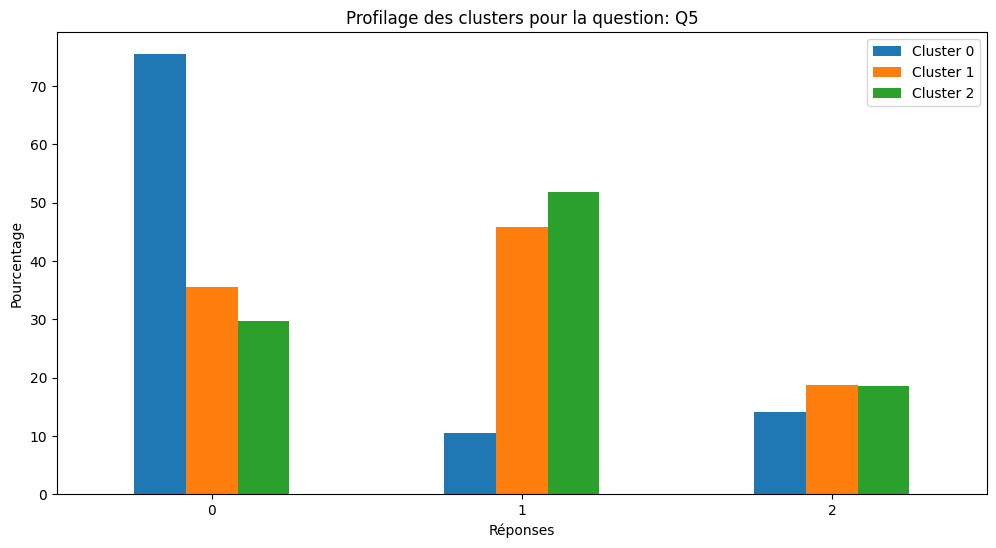

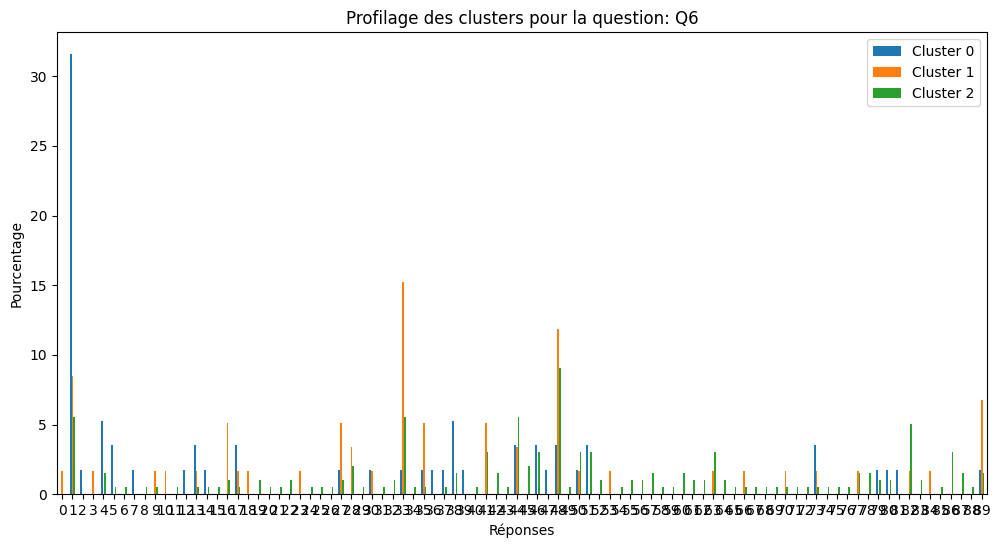

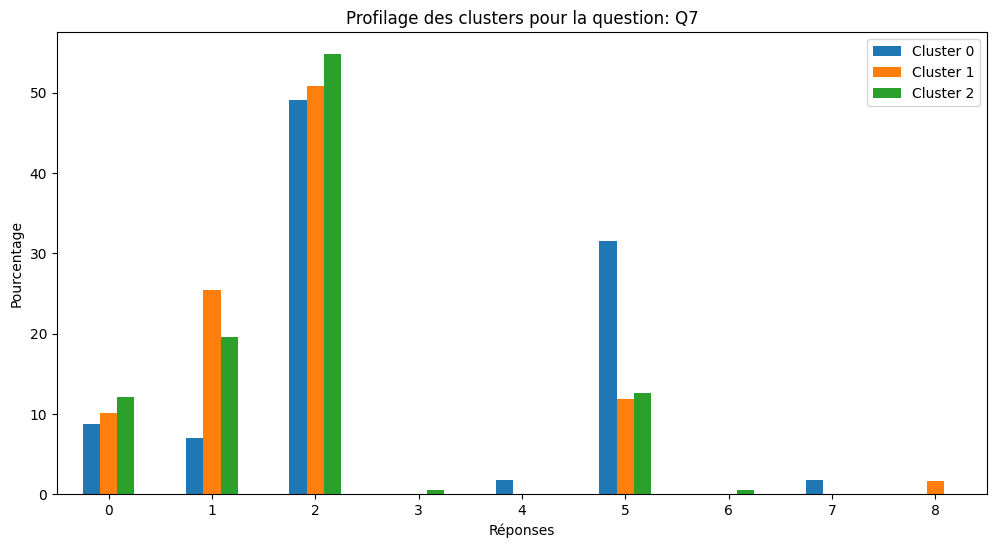

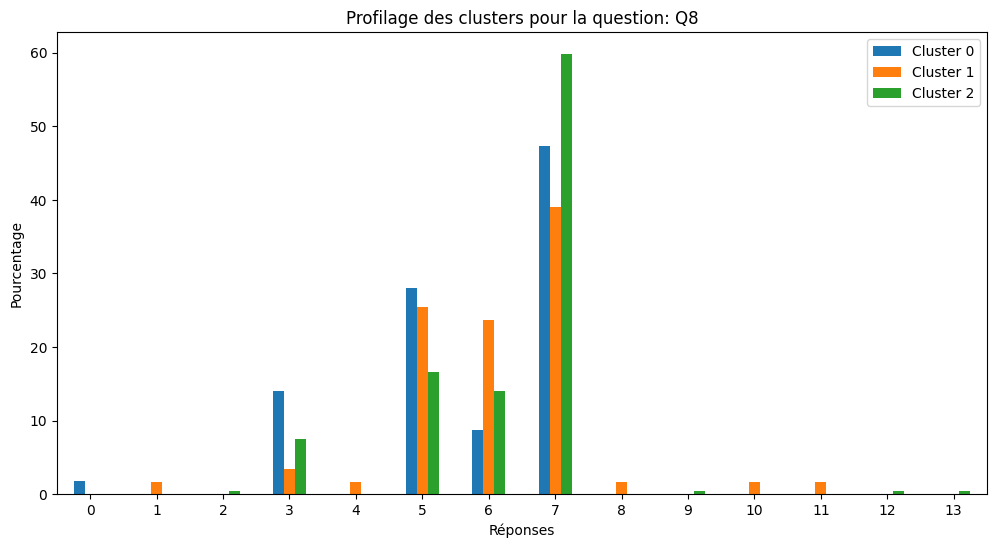

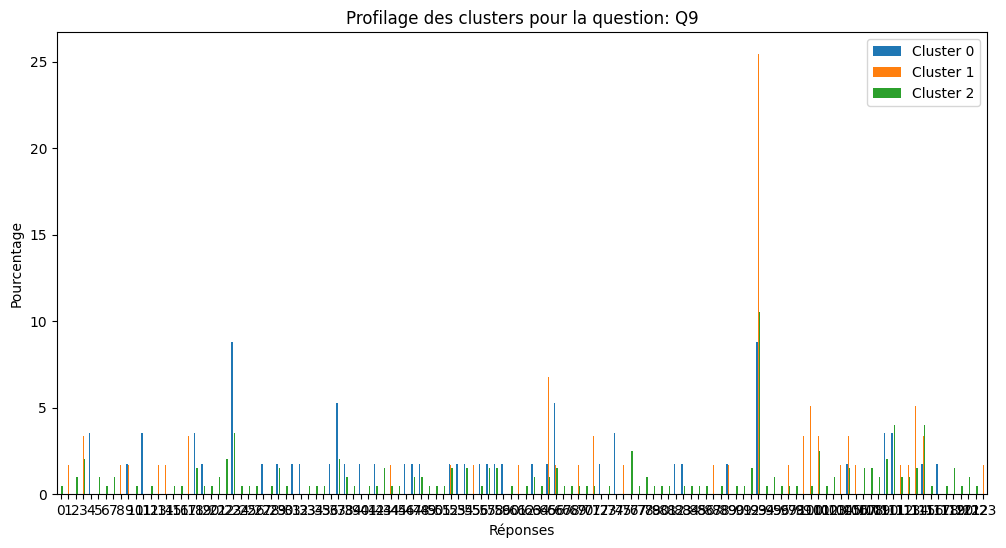

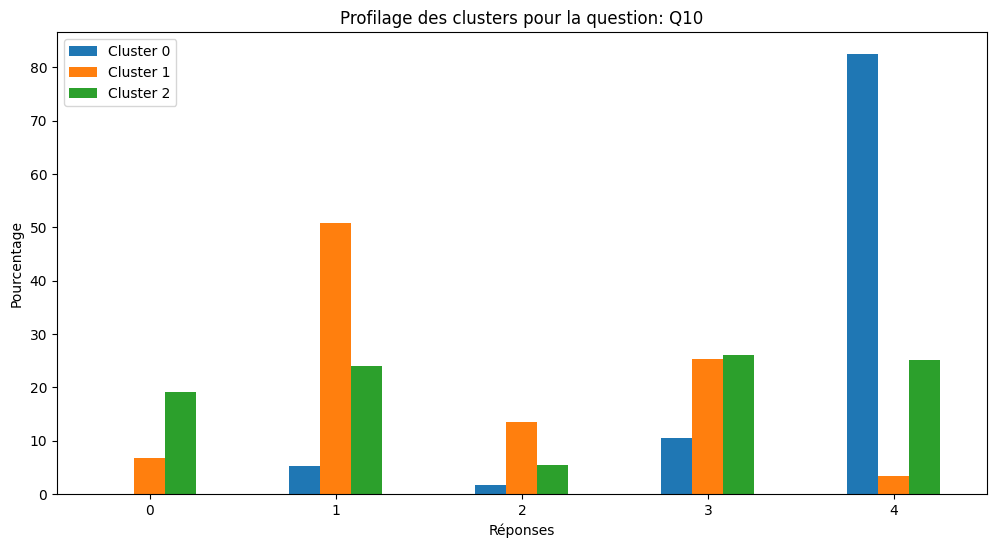

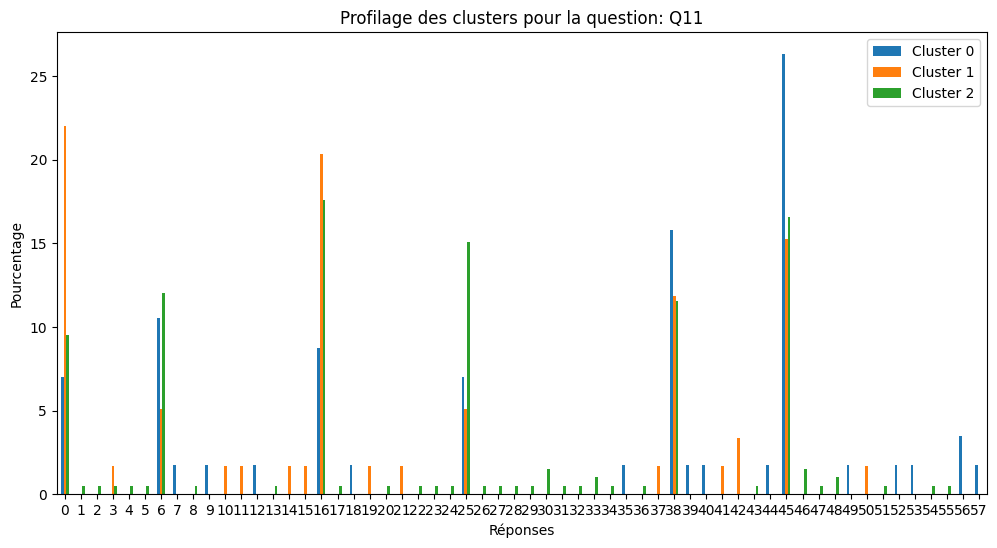

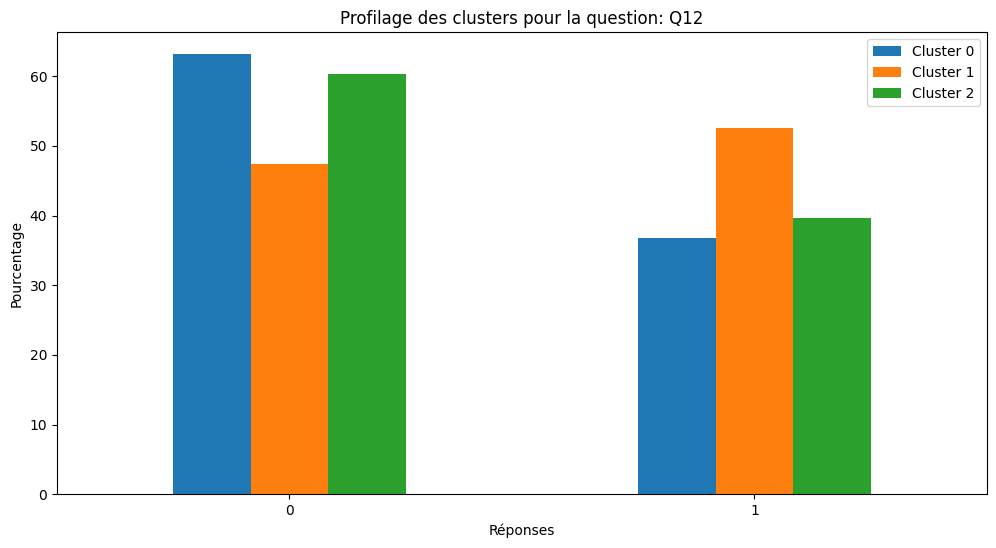

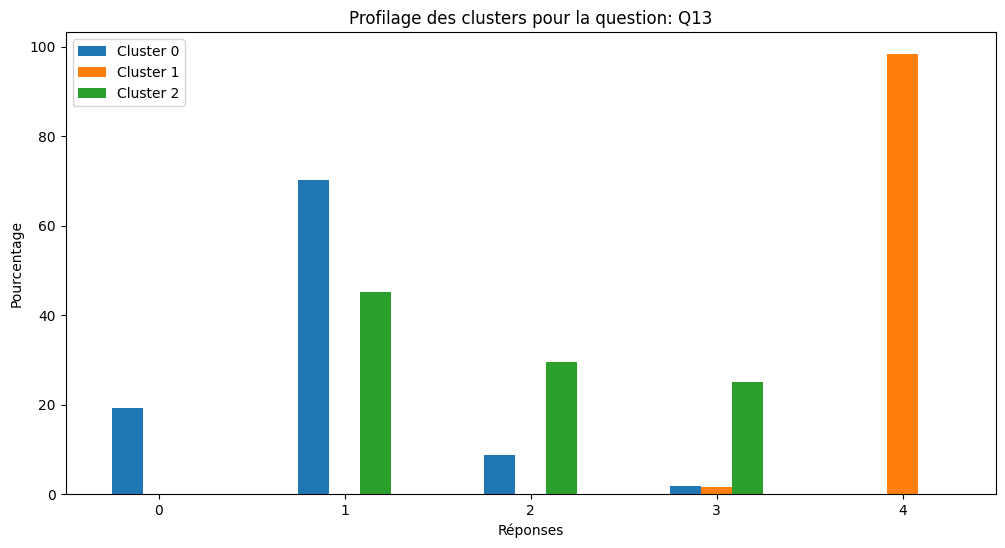

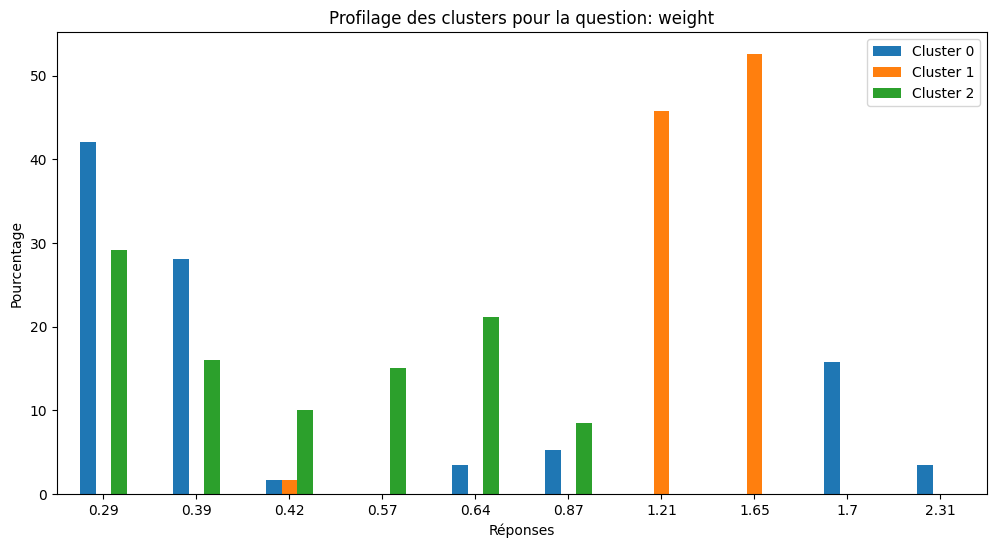

In [ ]:
# Profilage des clusters K-means pour toutes les questions
for question in df.columns:
    plot_cluster_profile(kmeans_profiles, question)

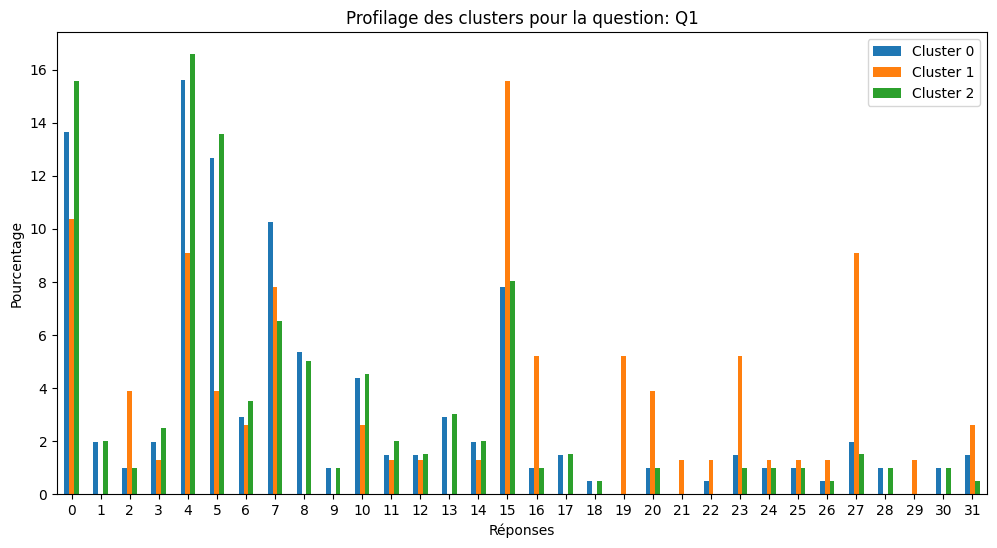

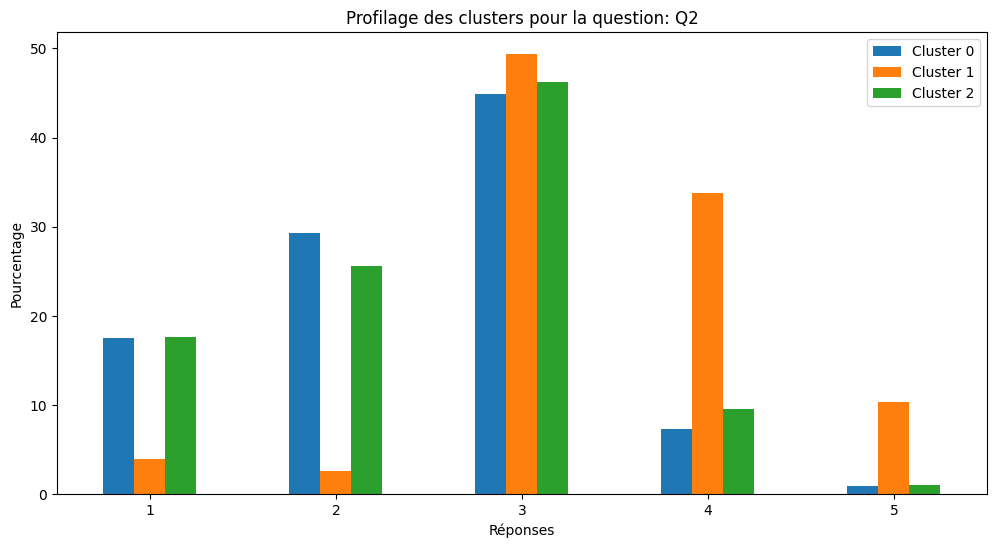

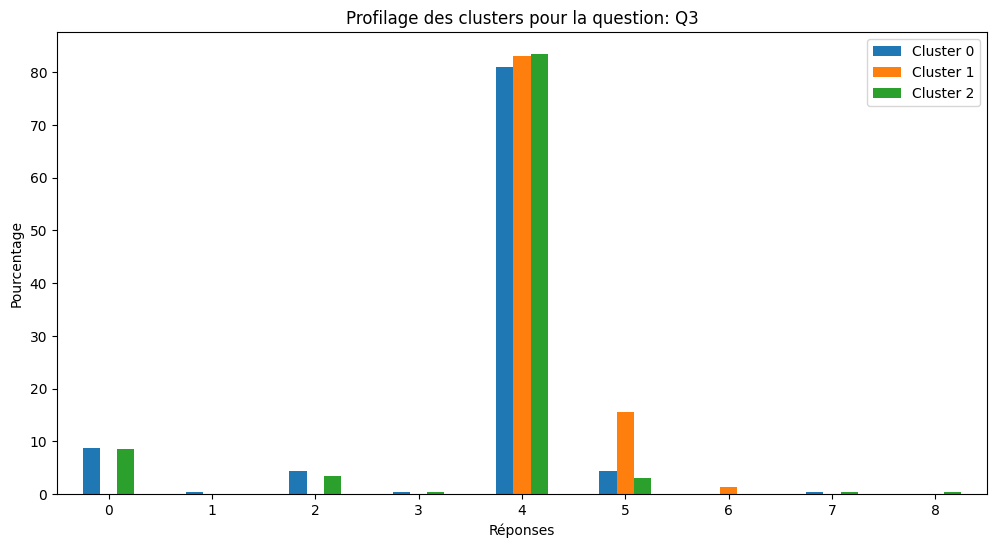

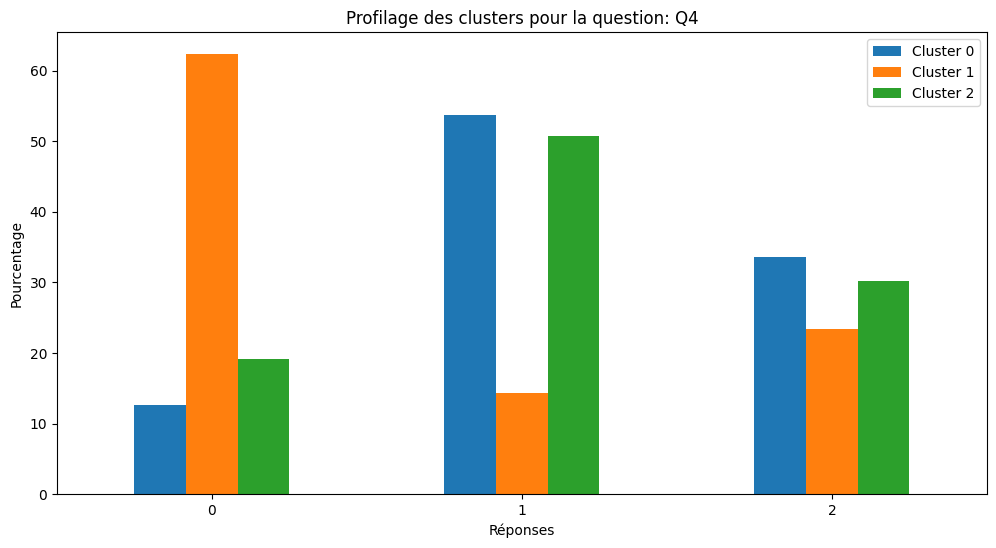

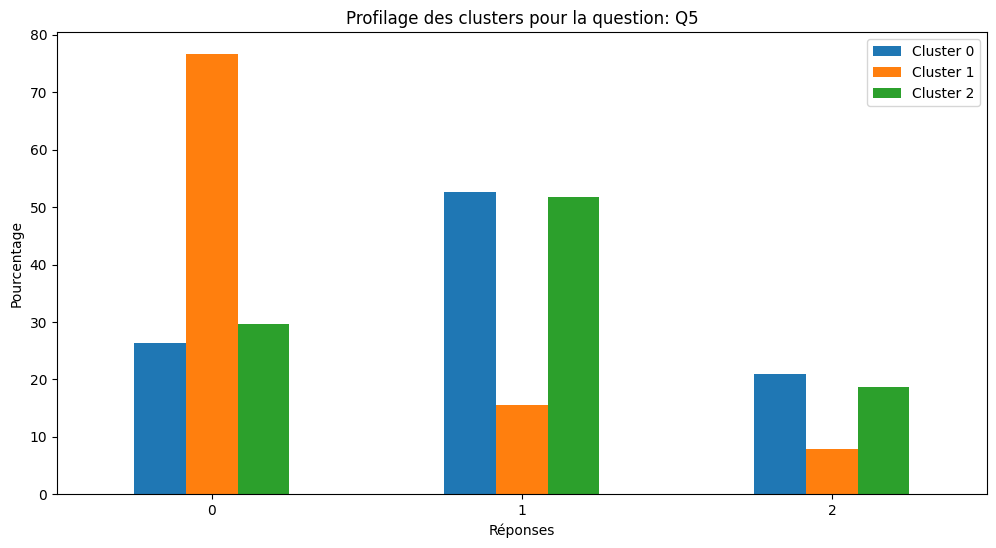

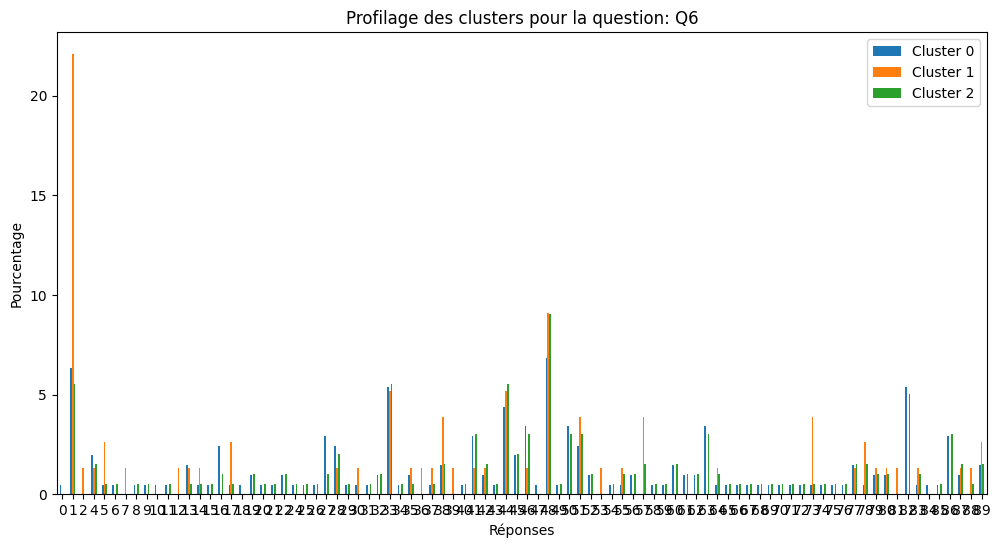

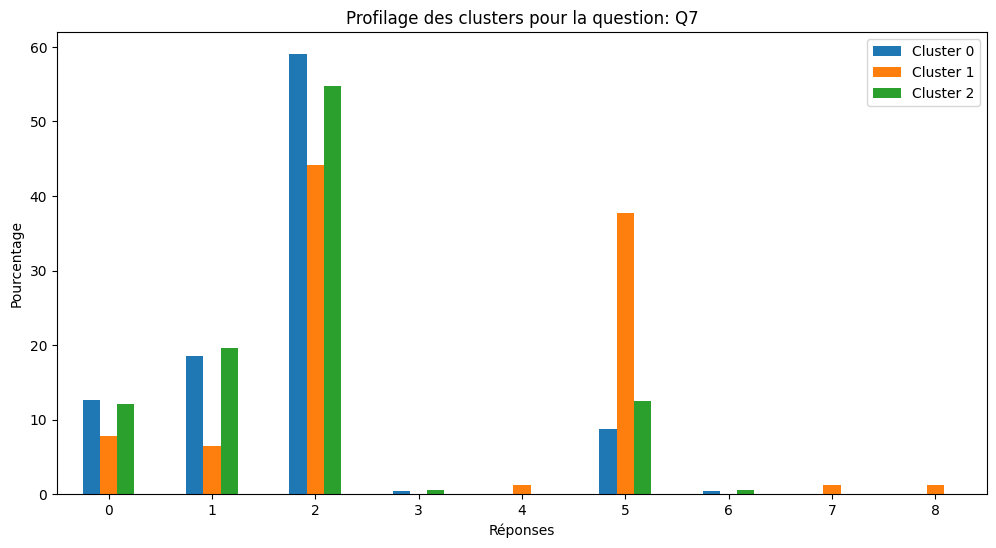

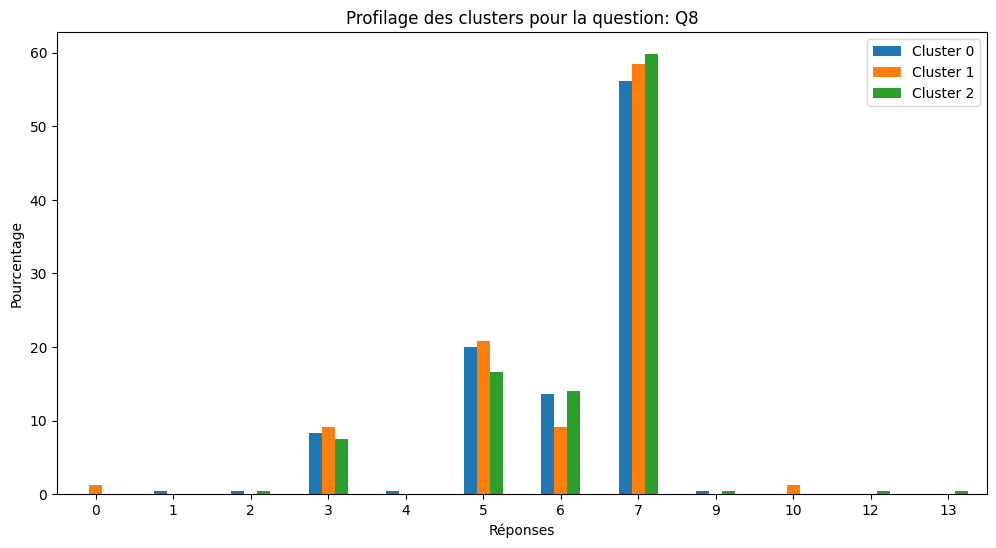

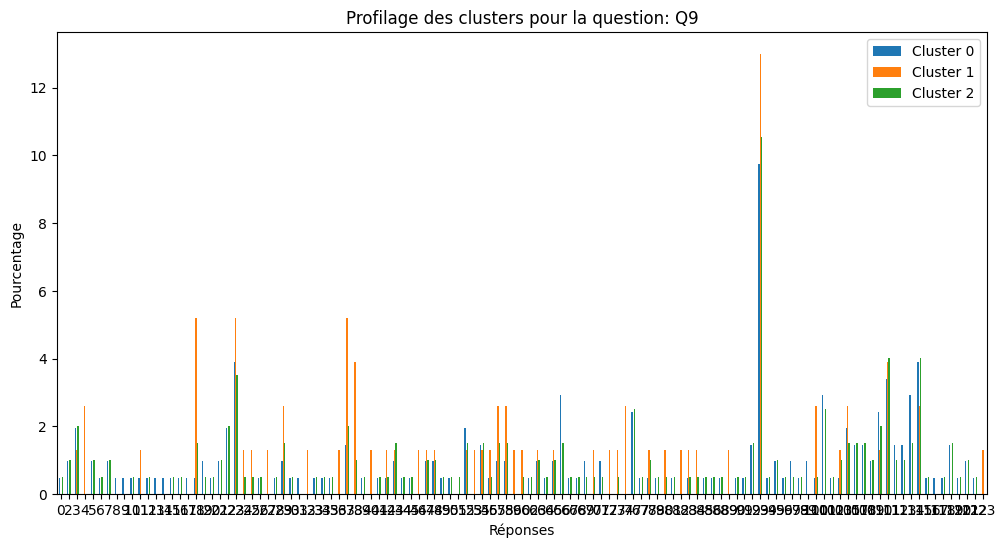

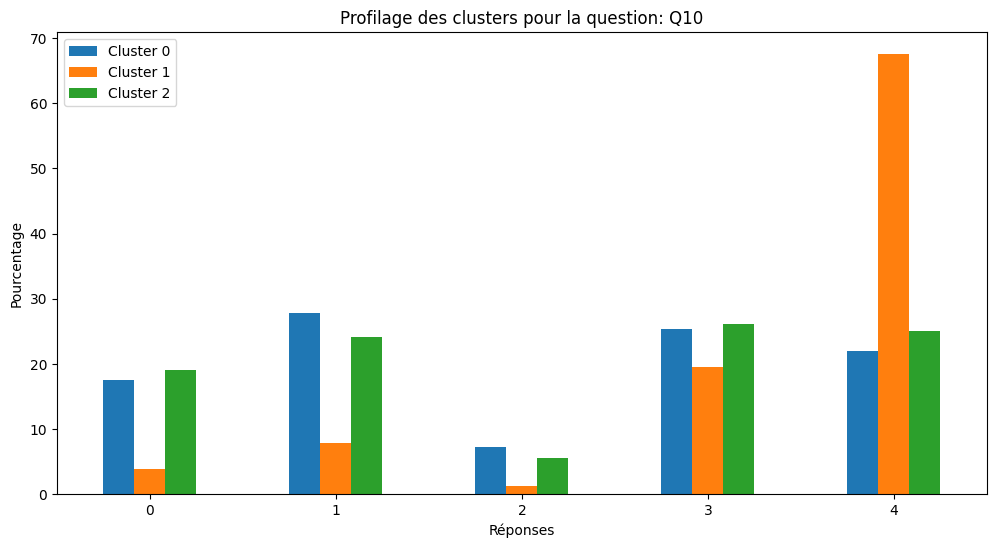

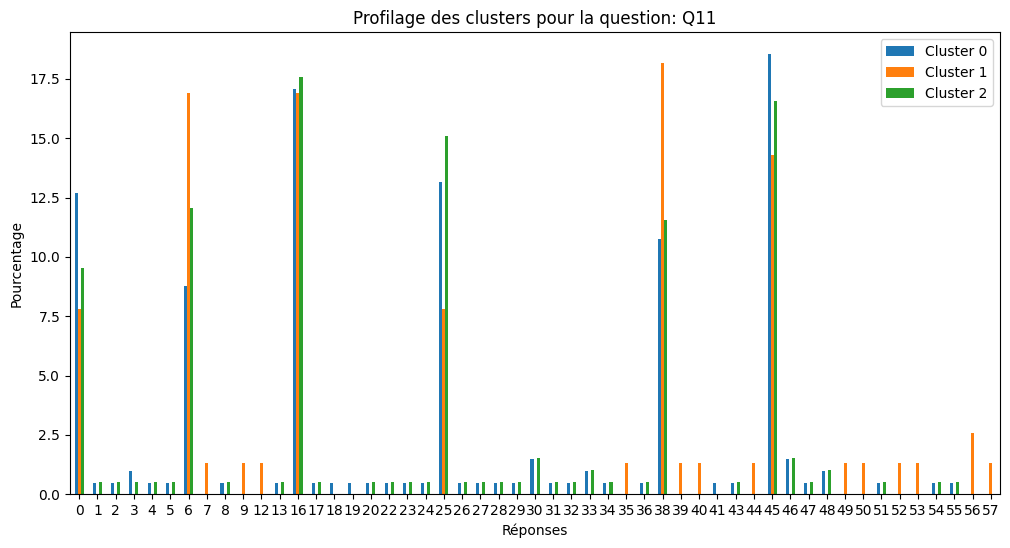

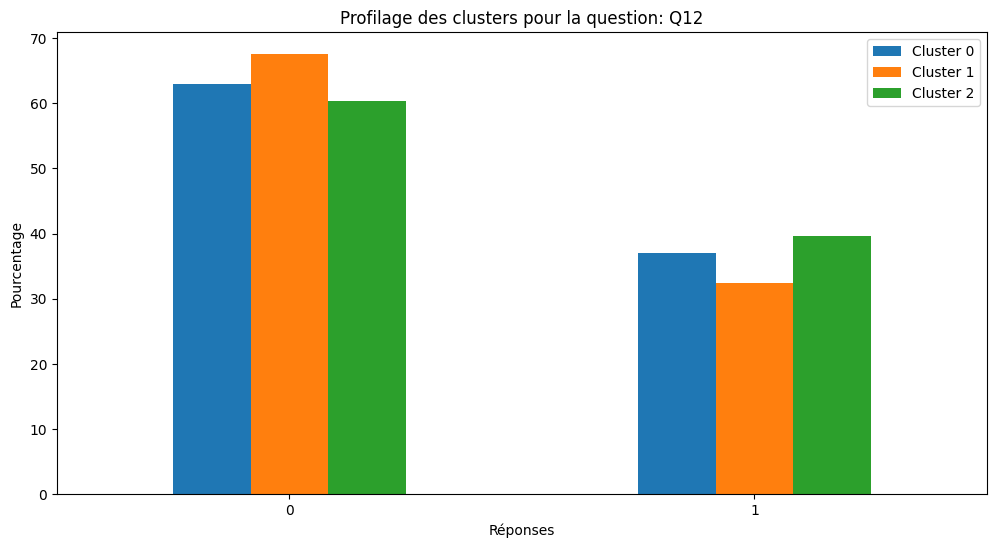

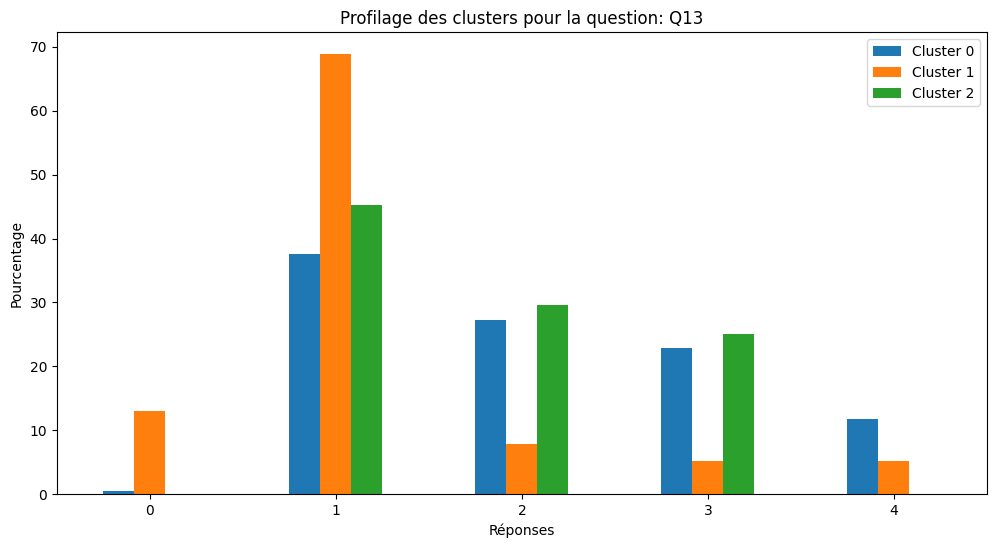

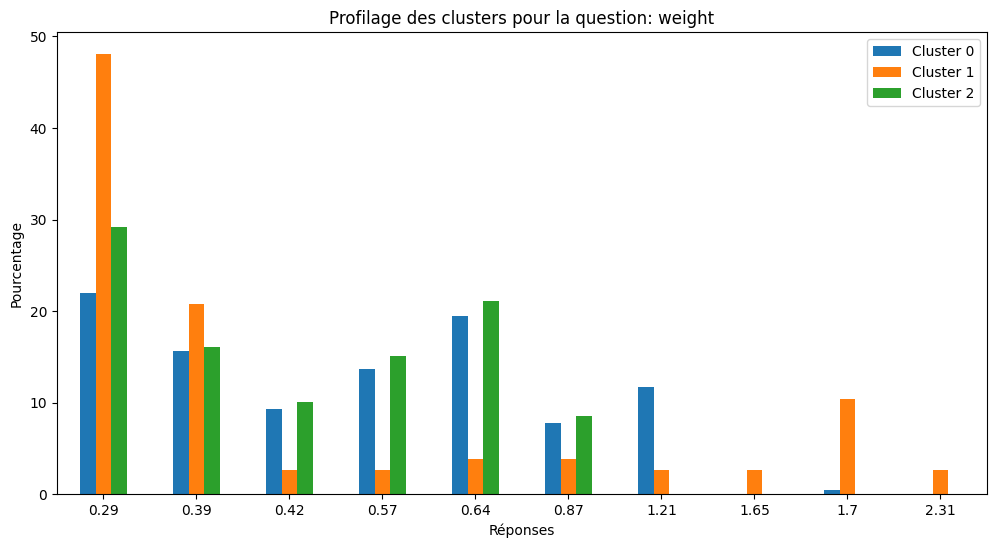

In [ ]:
# Profilage des clusters Agglomerative pour toutes les questions
for question in df.columns:
    plot_cluster_profile(agg_profiles, question)

In [ ]:
# Fonction pour tracer un histogramme pour une question spécifique et chaque cluster
def plot_question_distribution(data, question, cluster_labels):
    plt.figure(figsize=(12, 6))
    for cluster in sorted(set(cluster_labels)):
        sns.histplot(data[cluster_labels == cluster][question], kde=True, label=f'Cluster {cluster}', alpha=0.6)
    plt.title(f'Distribution des réponses pour la question {question}')
    plt.xlabel('Réponses')
    plt.ylabel('Fréquence')
    plt.legend()
    plt.show()

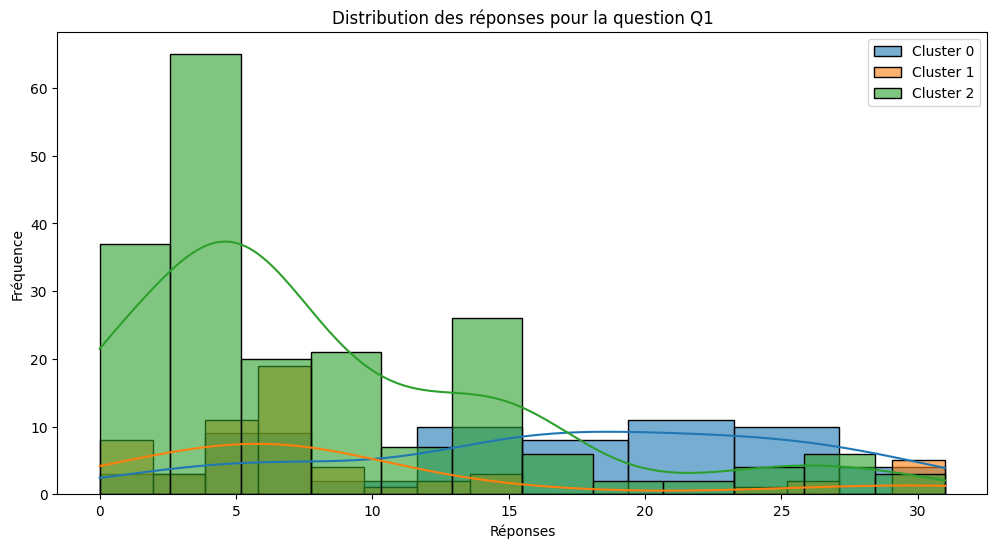

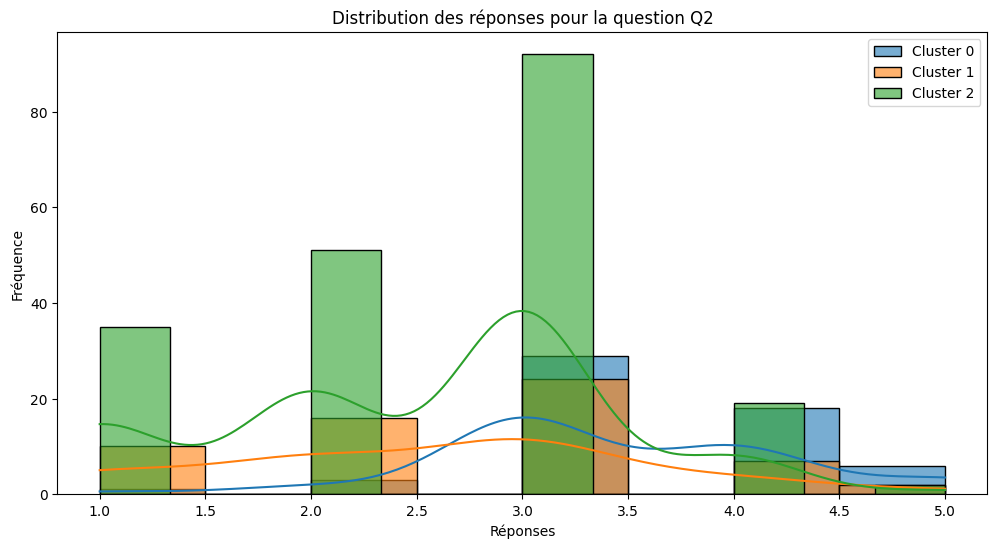

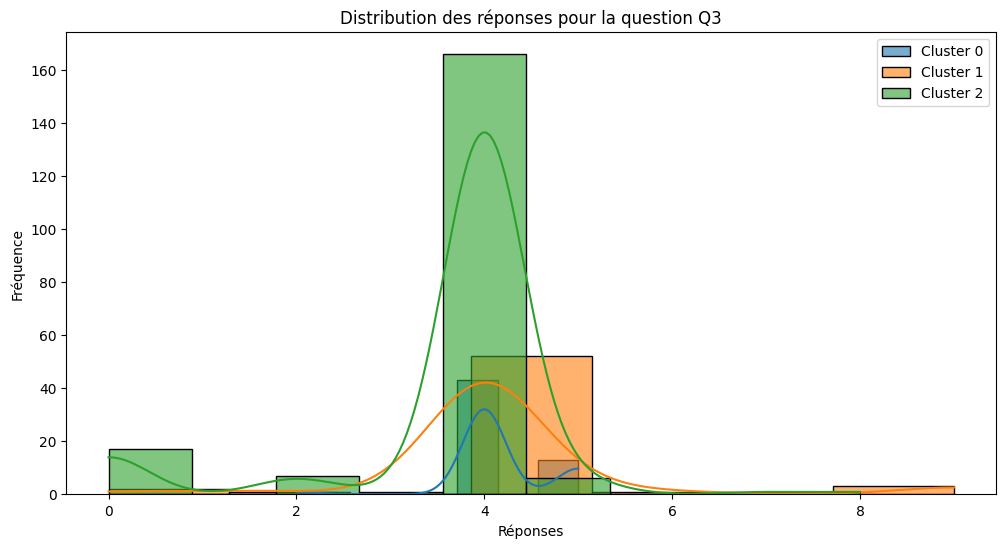

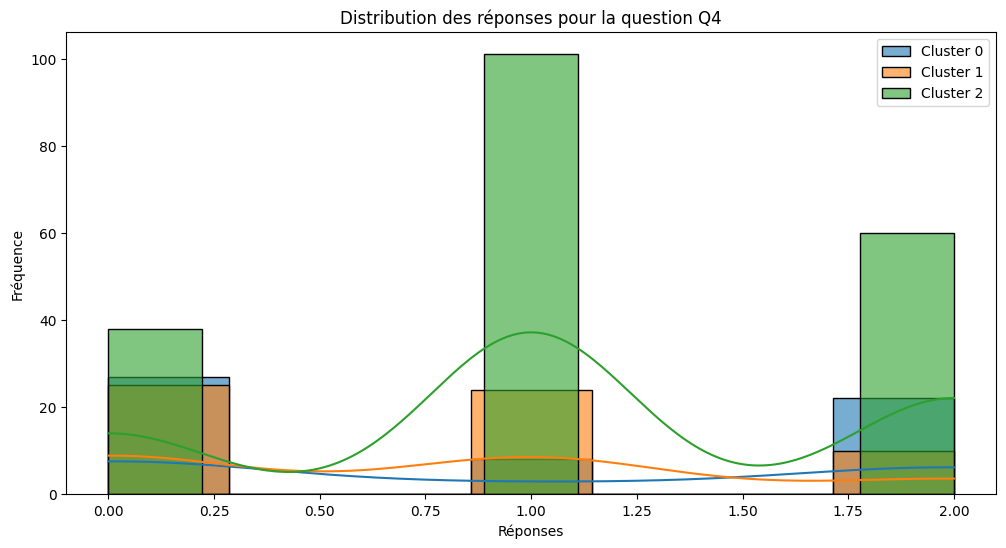

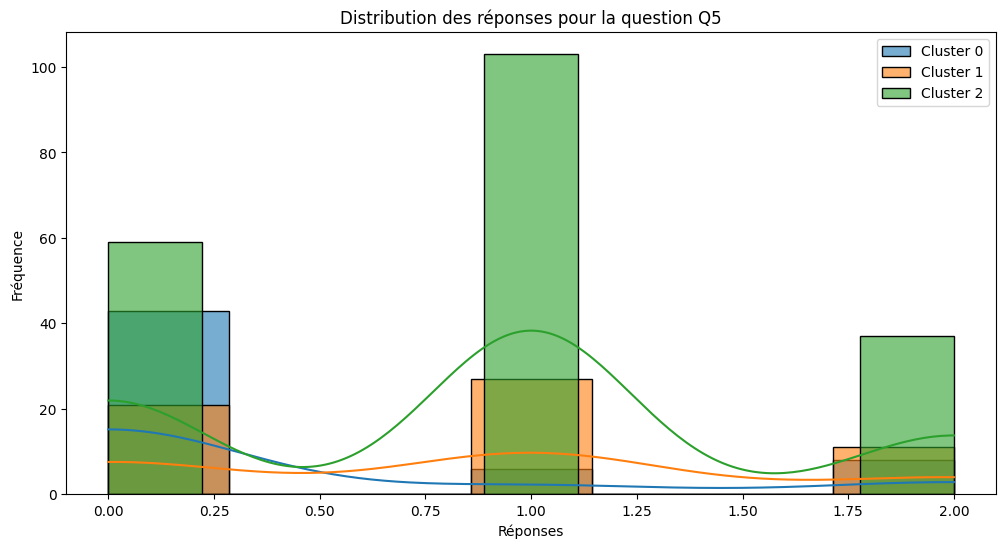

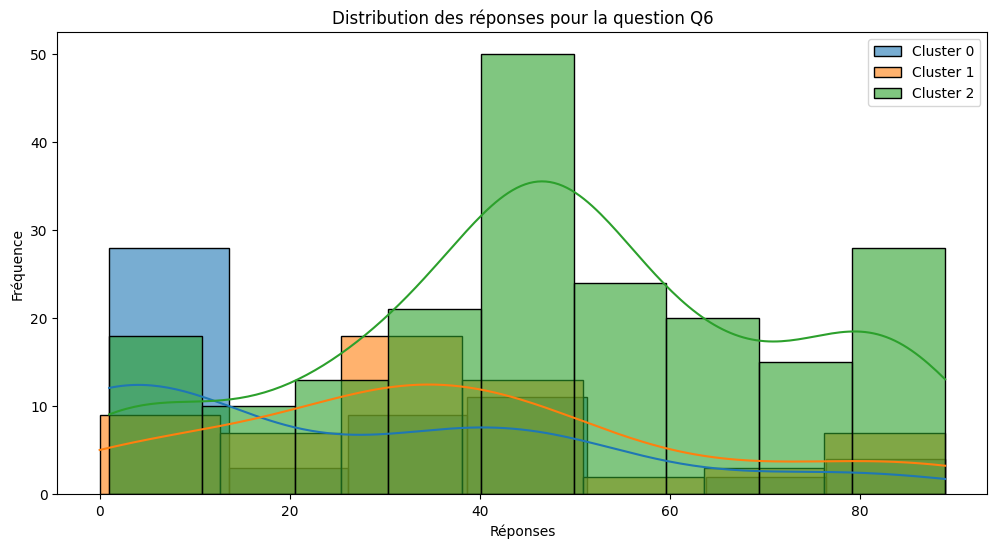

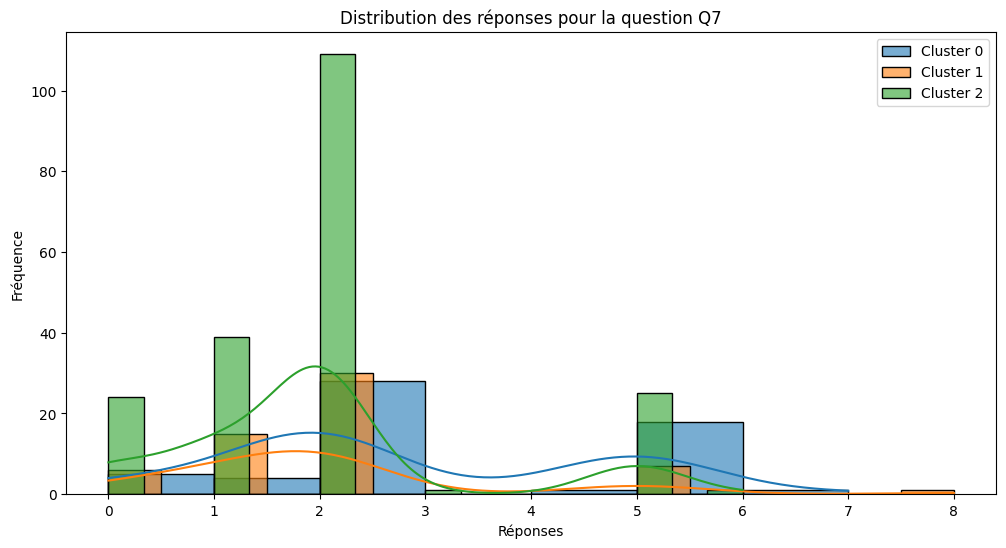

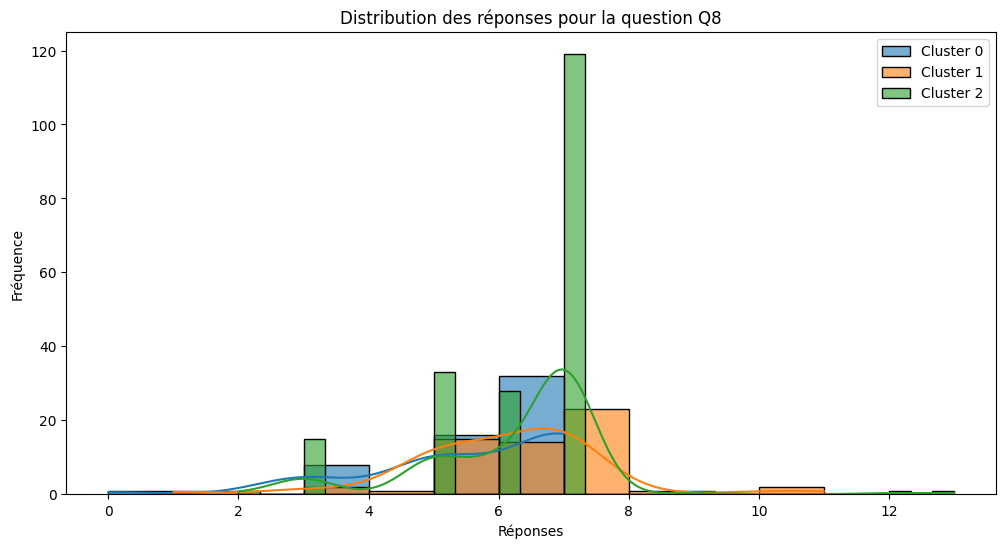

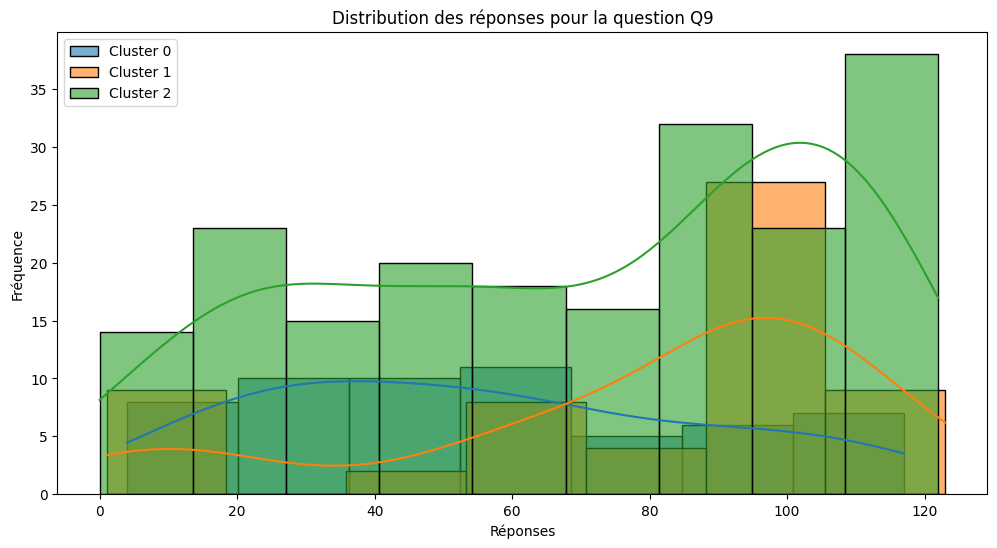

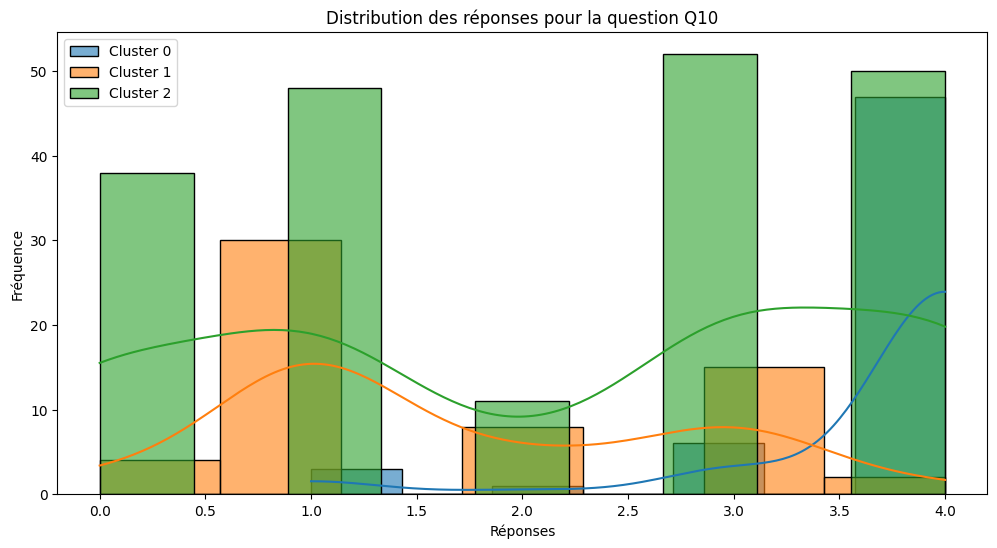

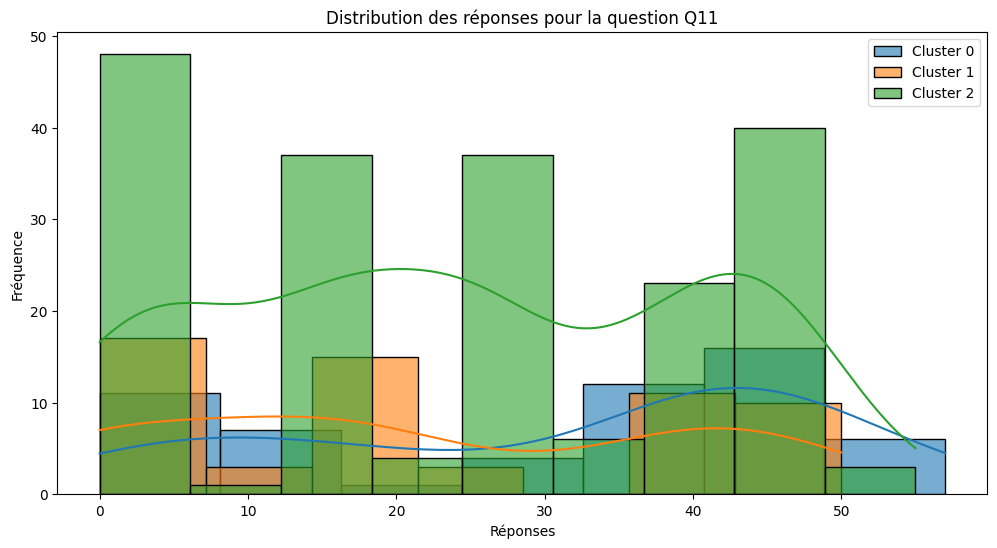

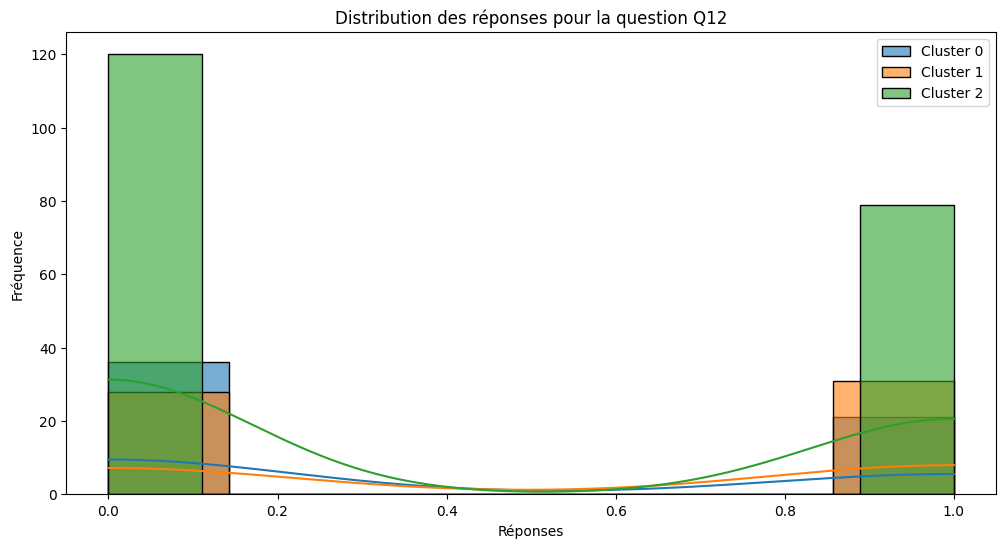

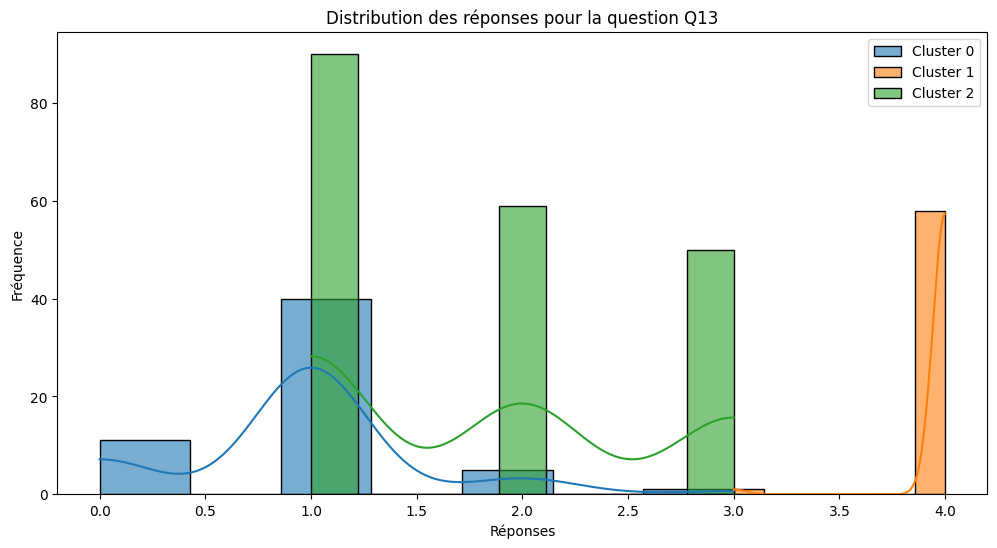

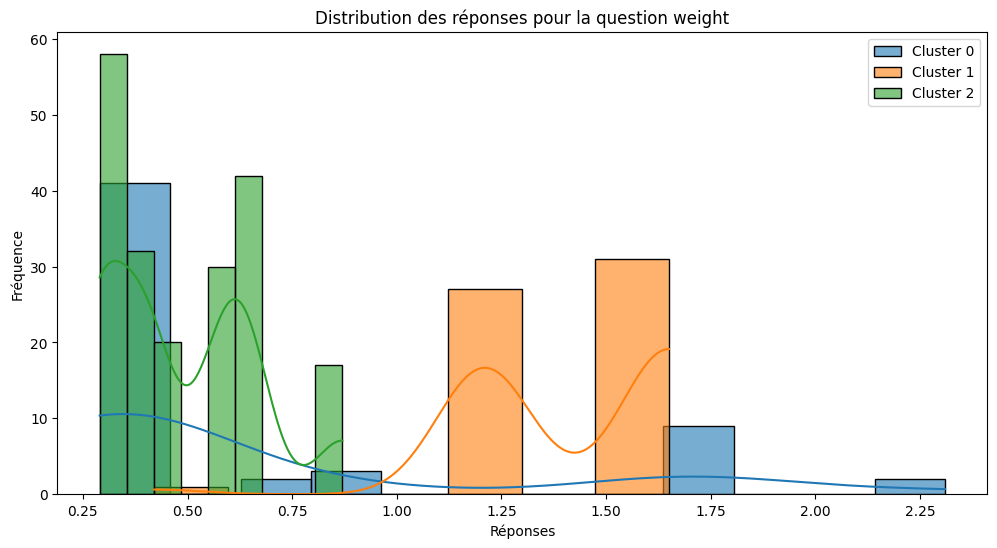

In [ ]:
# Tracer les histogrammes pour chaque question dans chaque cluster K-means
for question in df.columns:
    plot_question_distribution(df, question, kmeans_labels)


In [ ]:
# Fonction pour tracer un histogramme pour une question spécifique et chaque cluster
def plot_question_distribution(data, question, cluster_labels):
    unique_clusters = sorted(set(cluster_labels))
    num_clusters = len(unique_clusters)

    fig, axs = plt.subplots(num_clusters, 1, figsize=(12, 6*num_clusters))

    for i, cluster in enumerate(unique_clusters):
        axs[i].hist(data[cluster_labels == cluster][question], bins=20, color='skyblue', alpha=0.6)
        axs[i].set_title(f'Cluster {cluster}')
        axs[i].set_xlabel('Réponses')
        axs[i].set_ylabel('Fréquence')

    plt.tight_layout()
    plt.show()

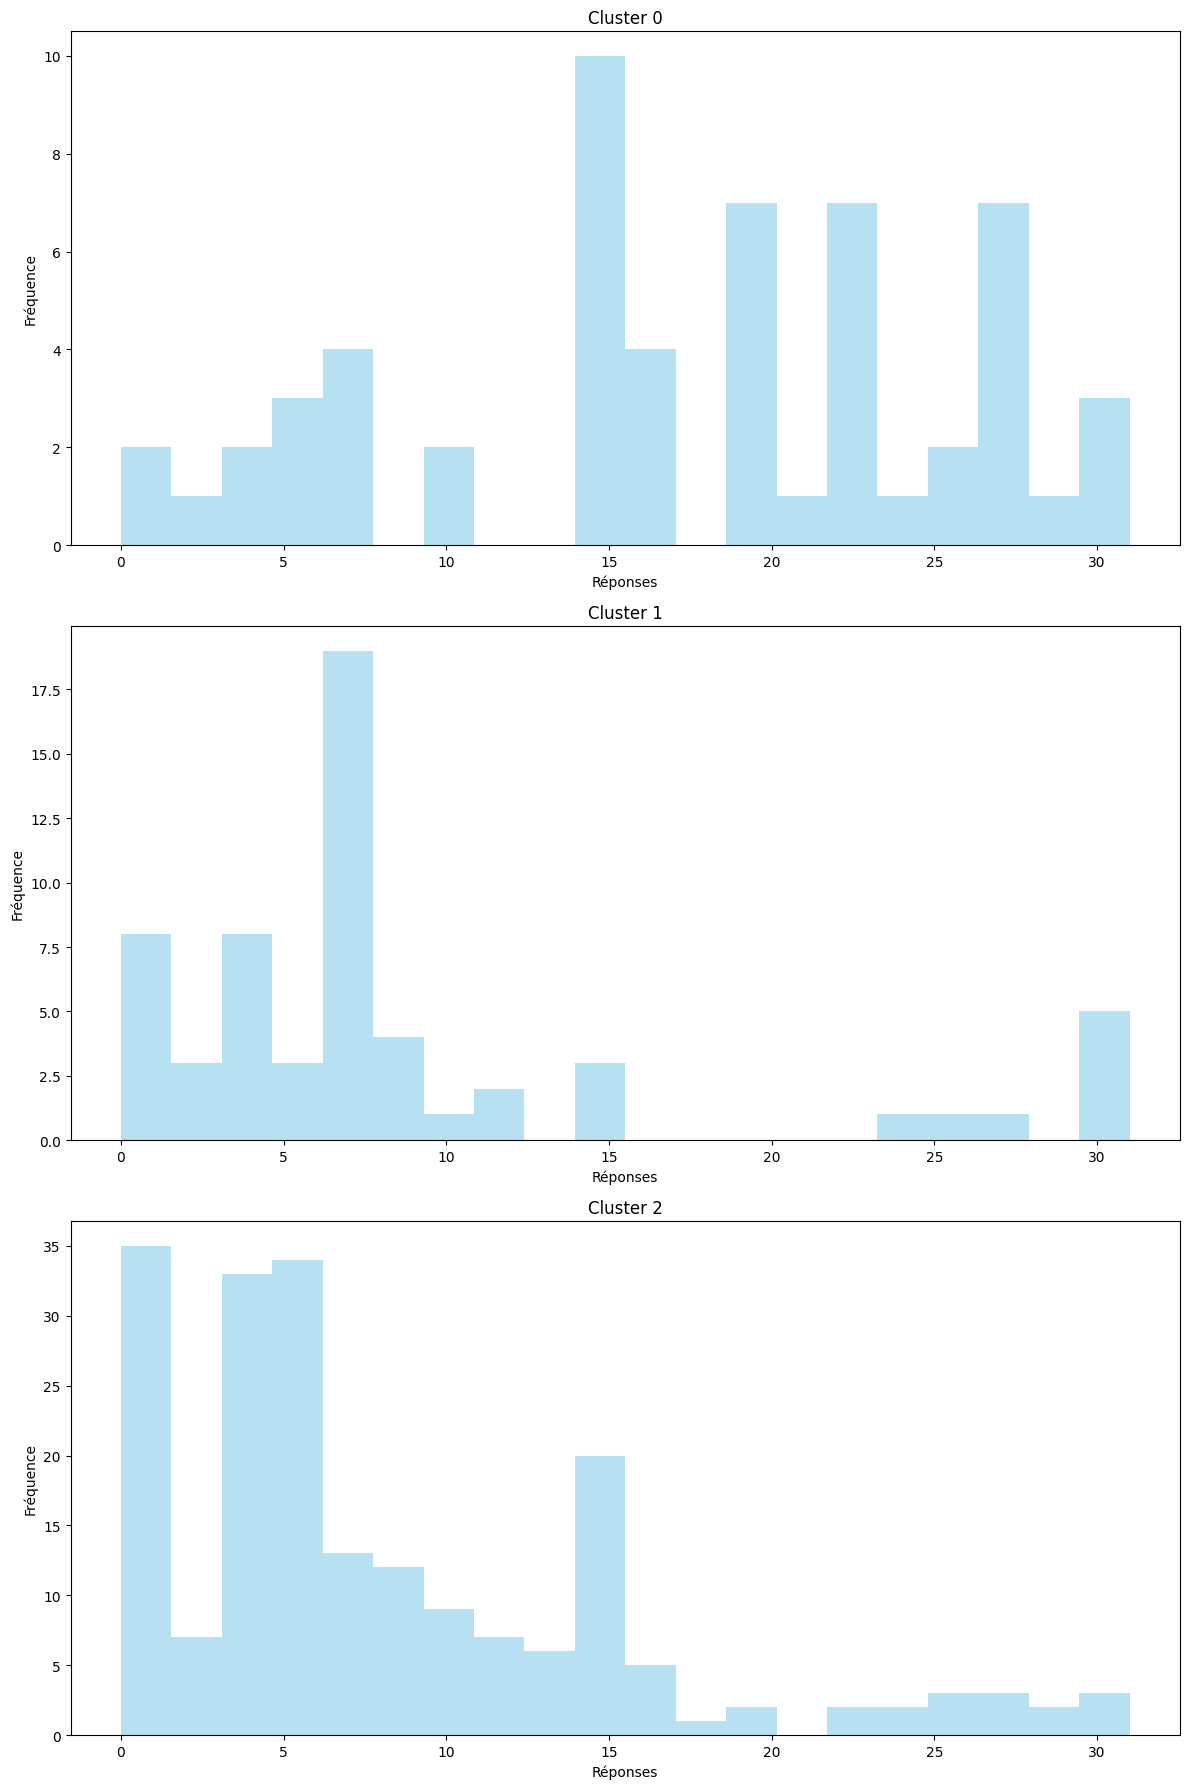

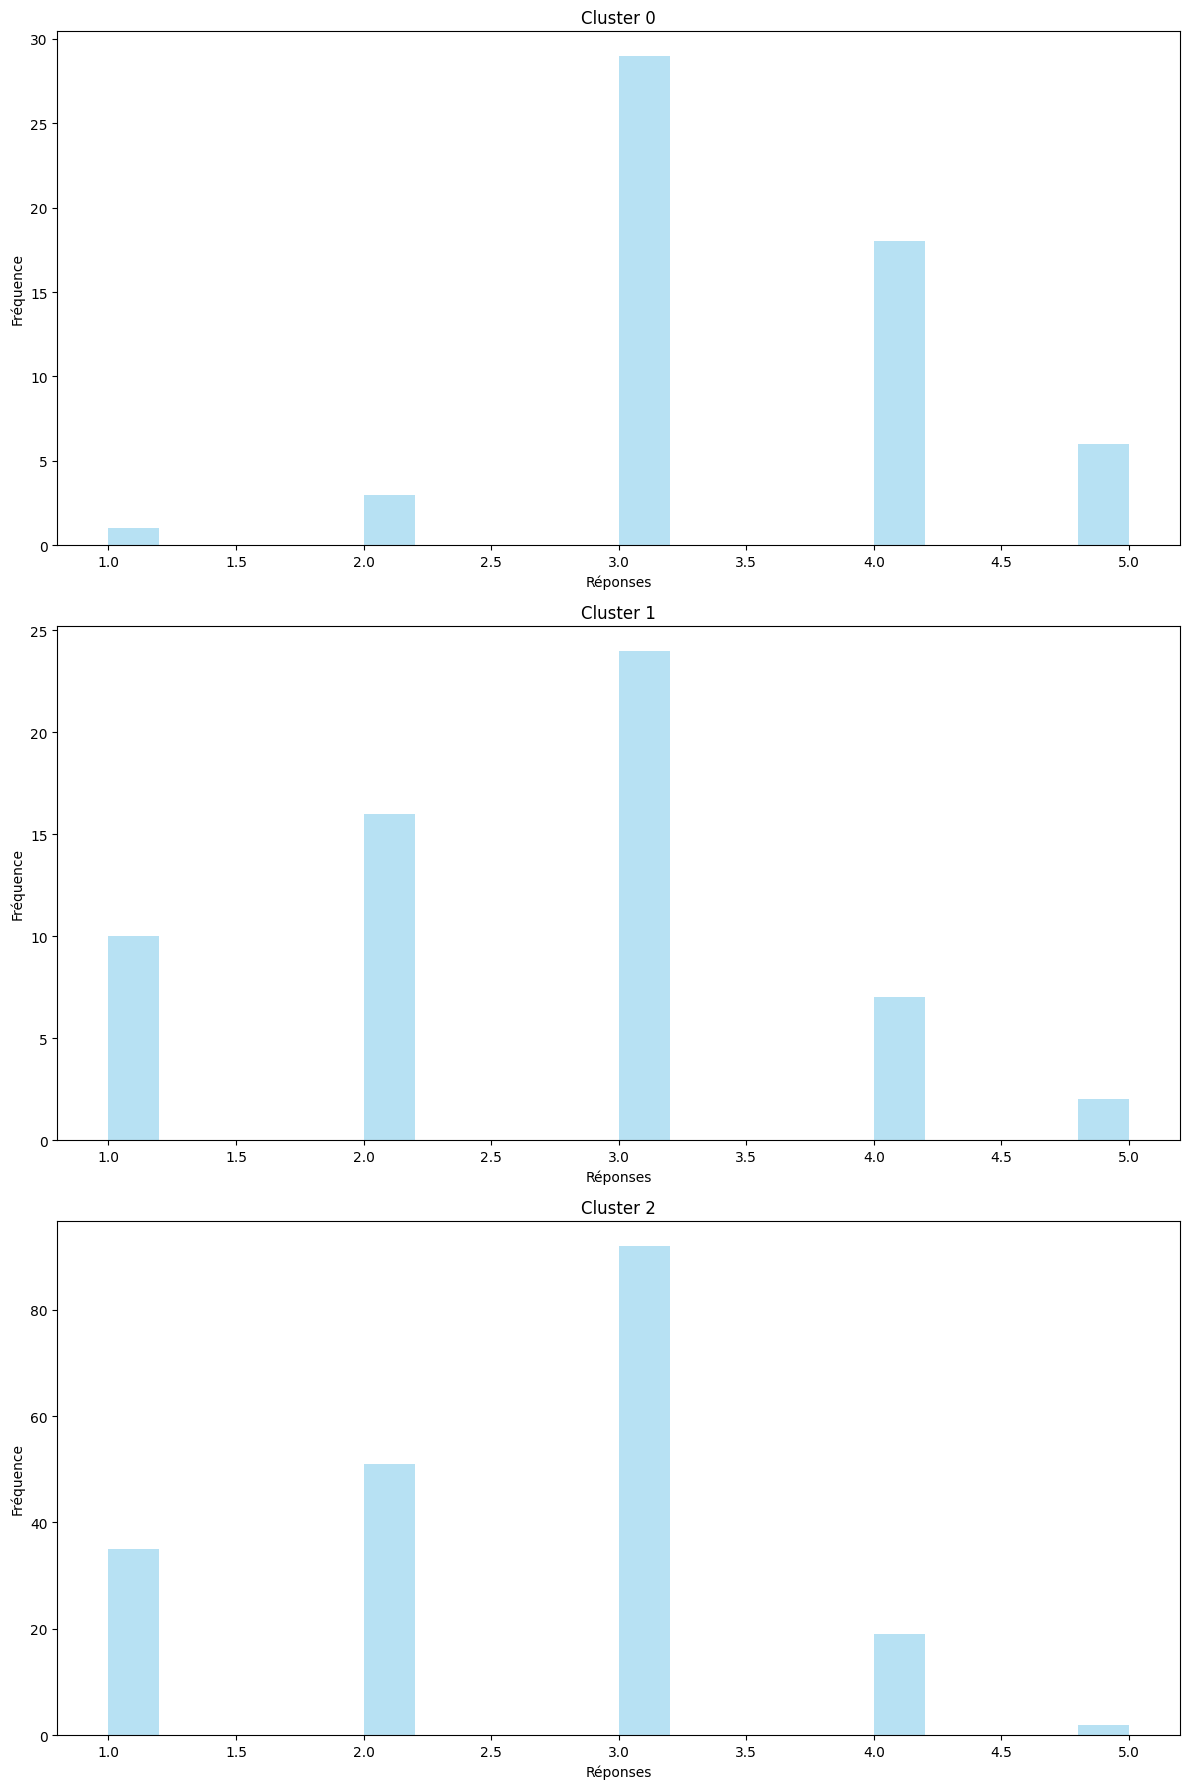

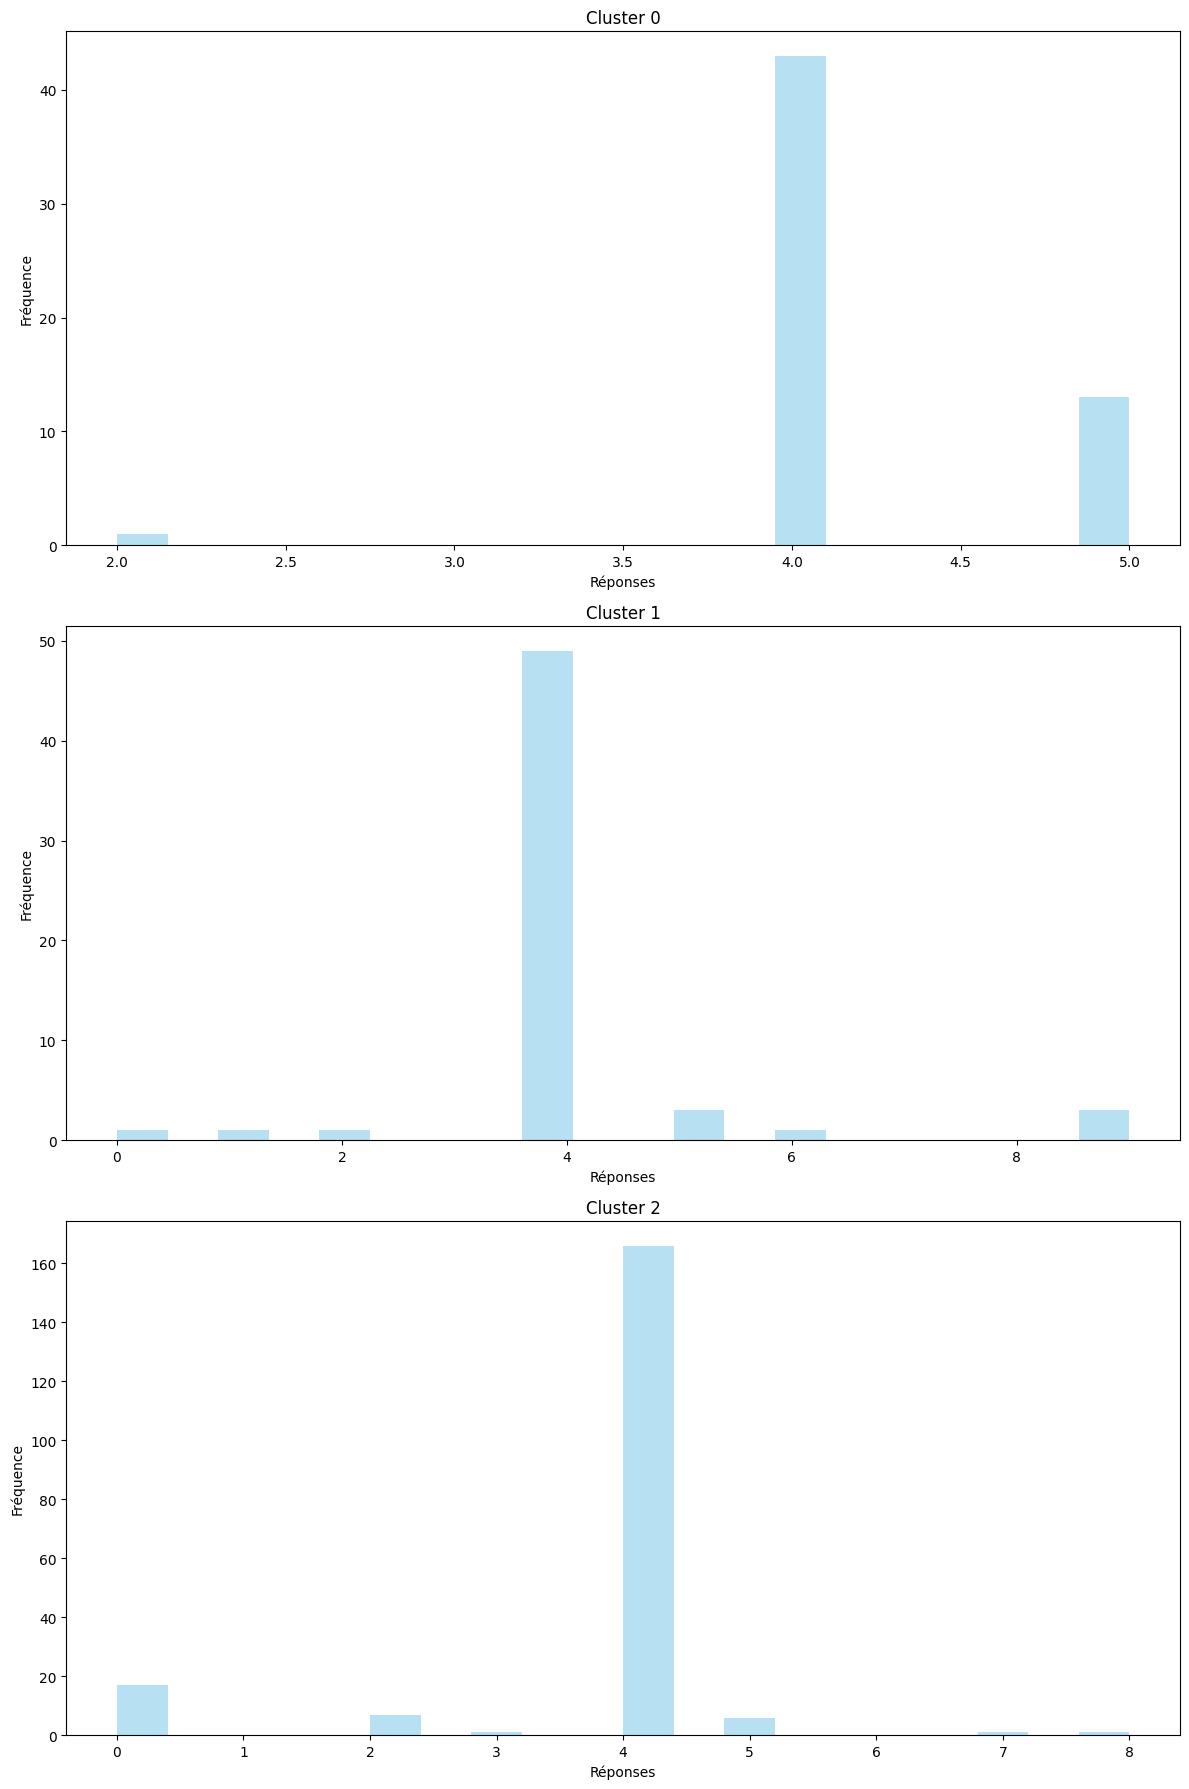

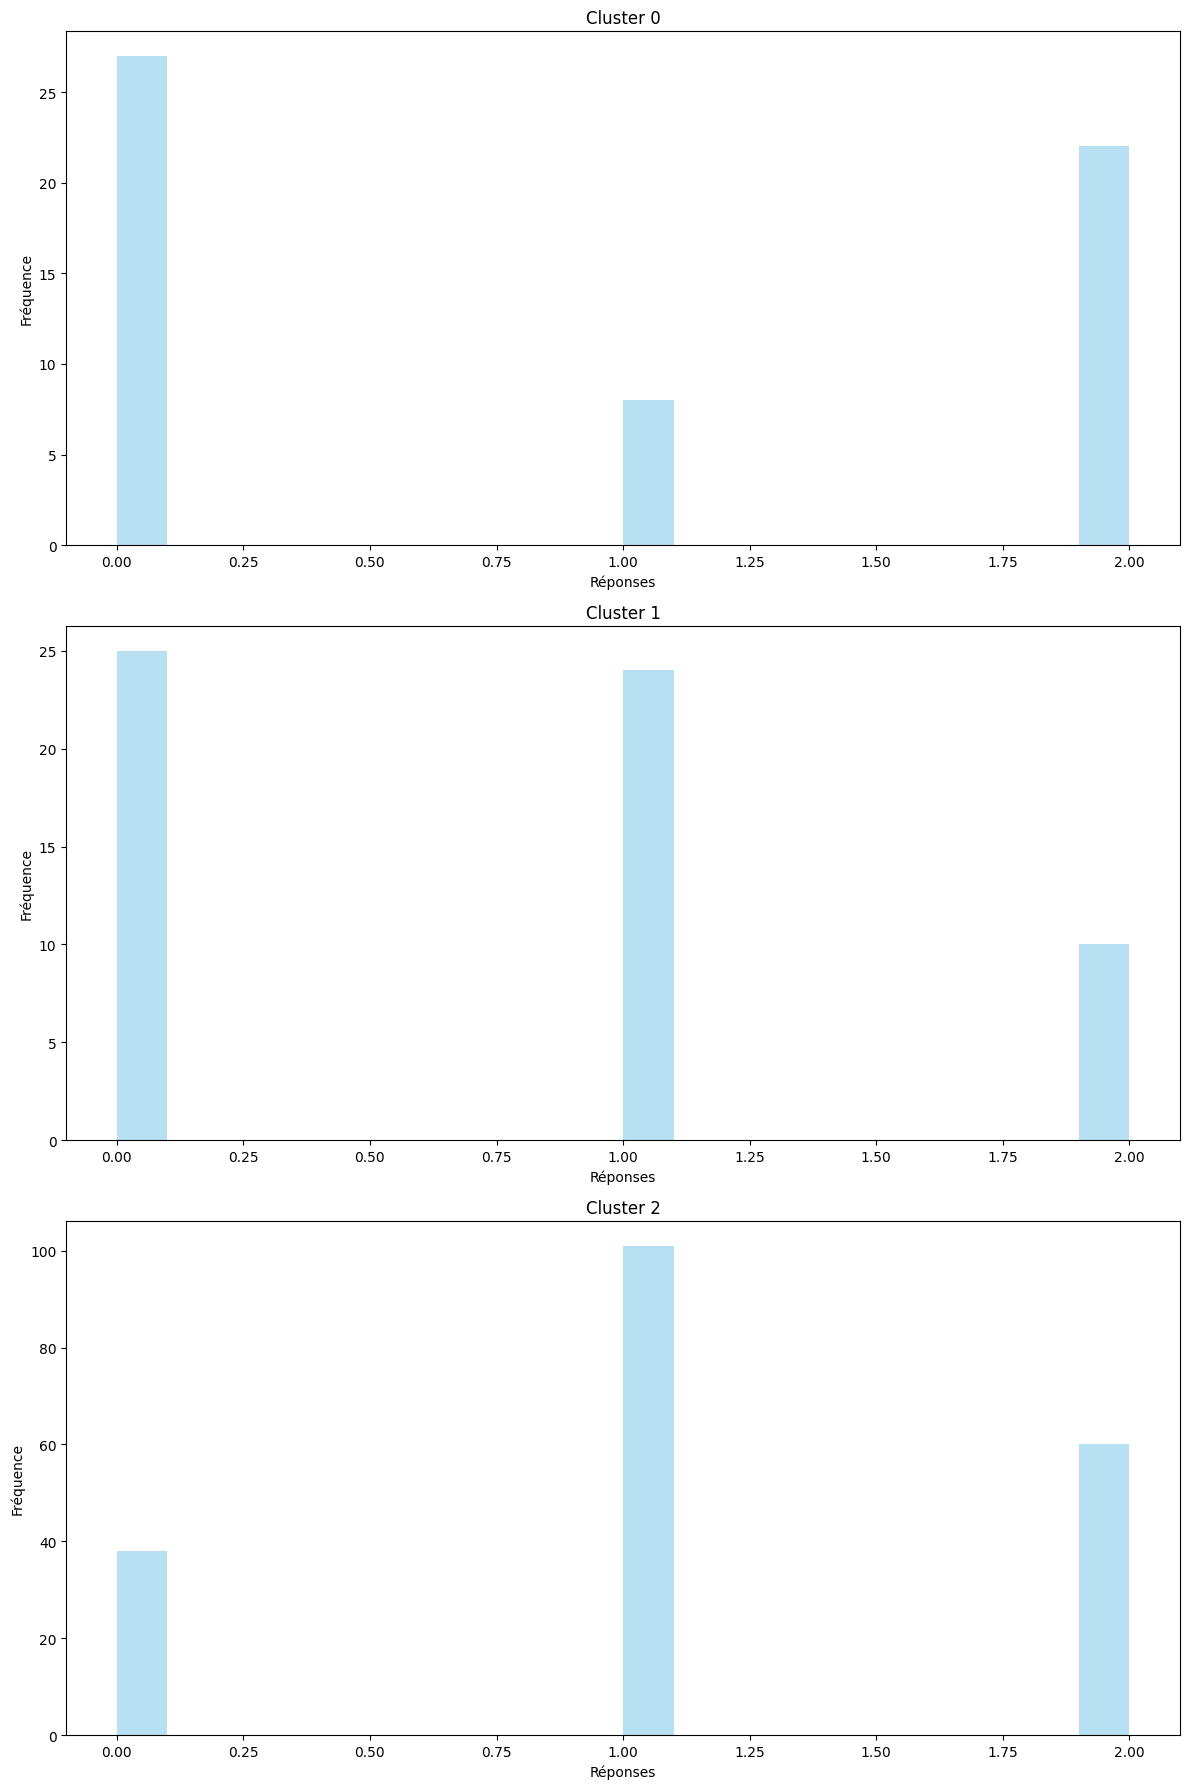

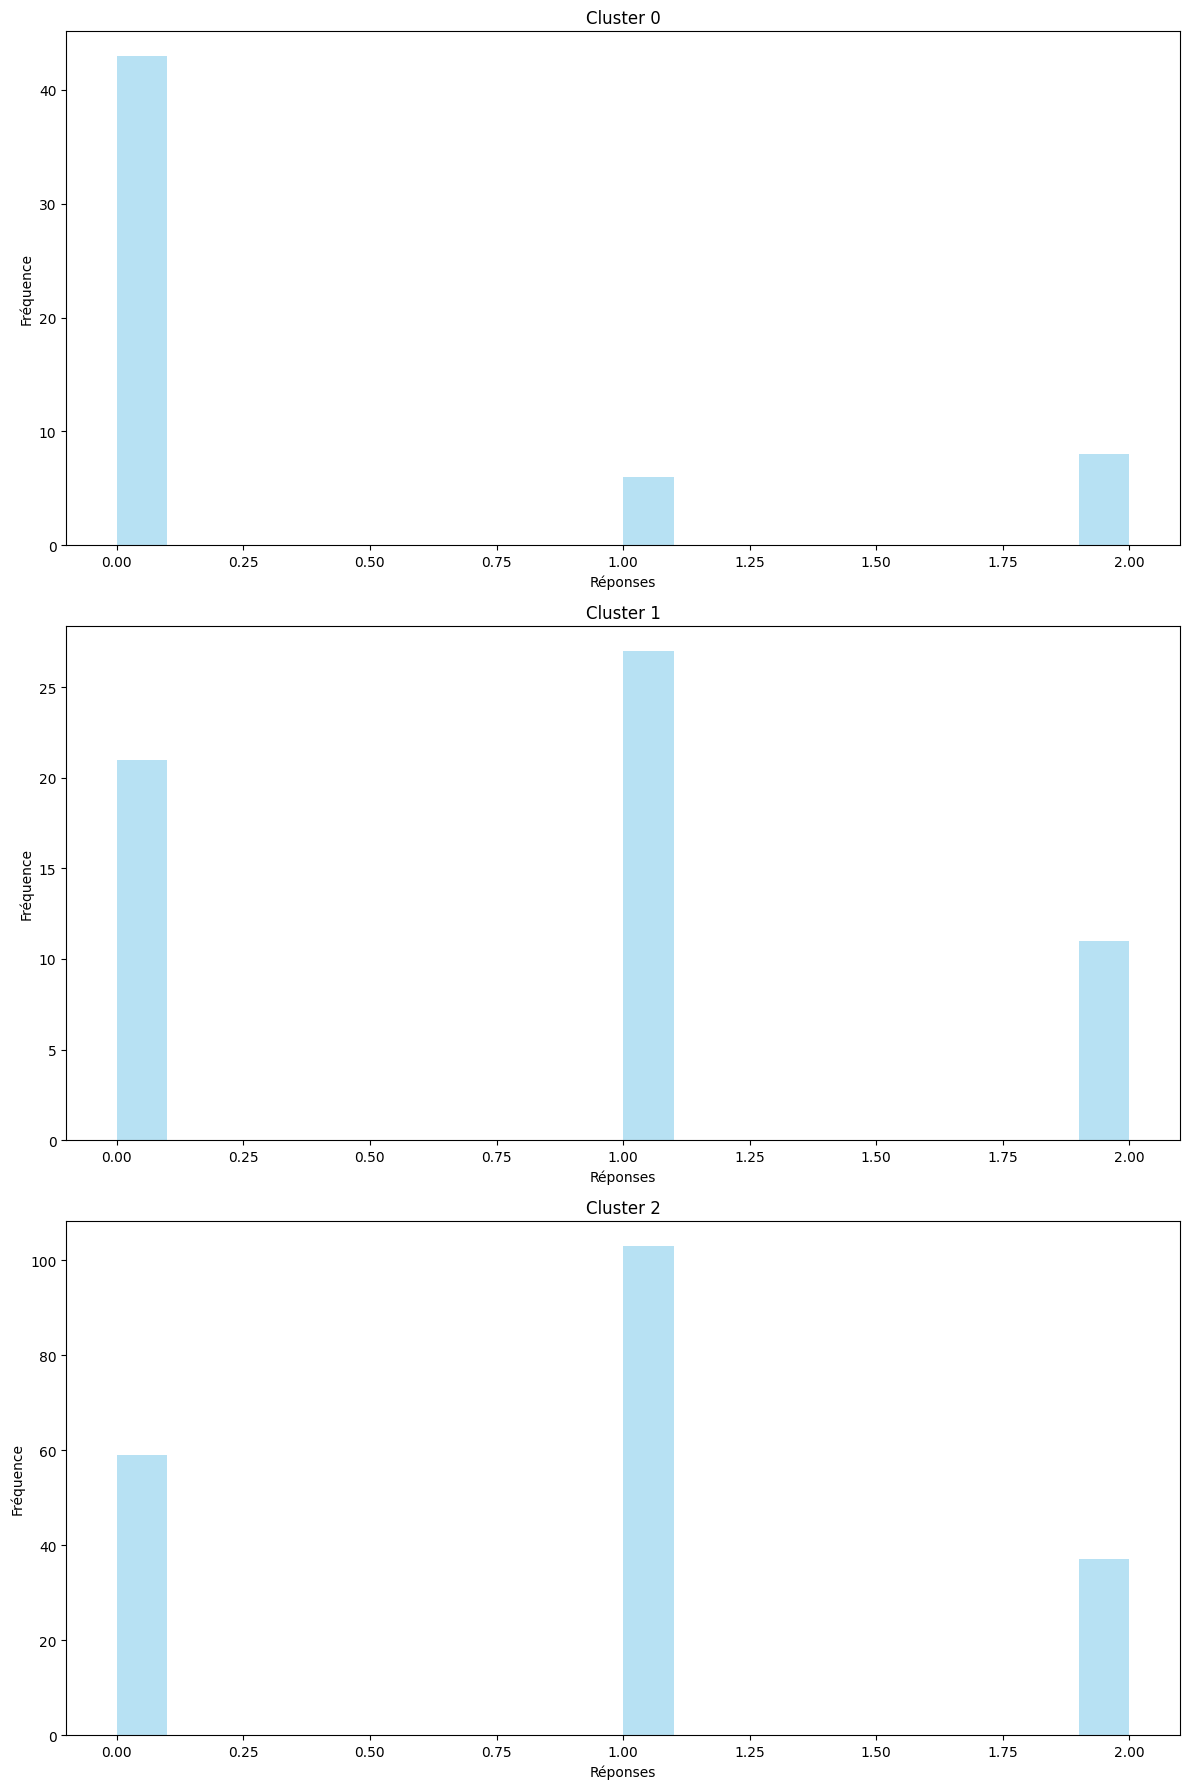

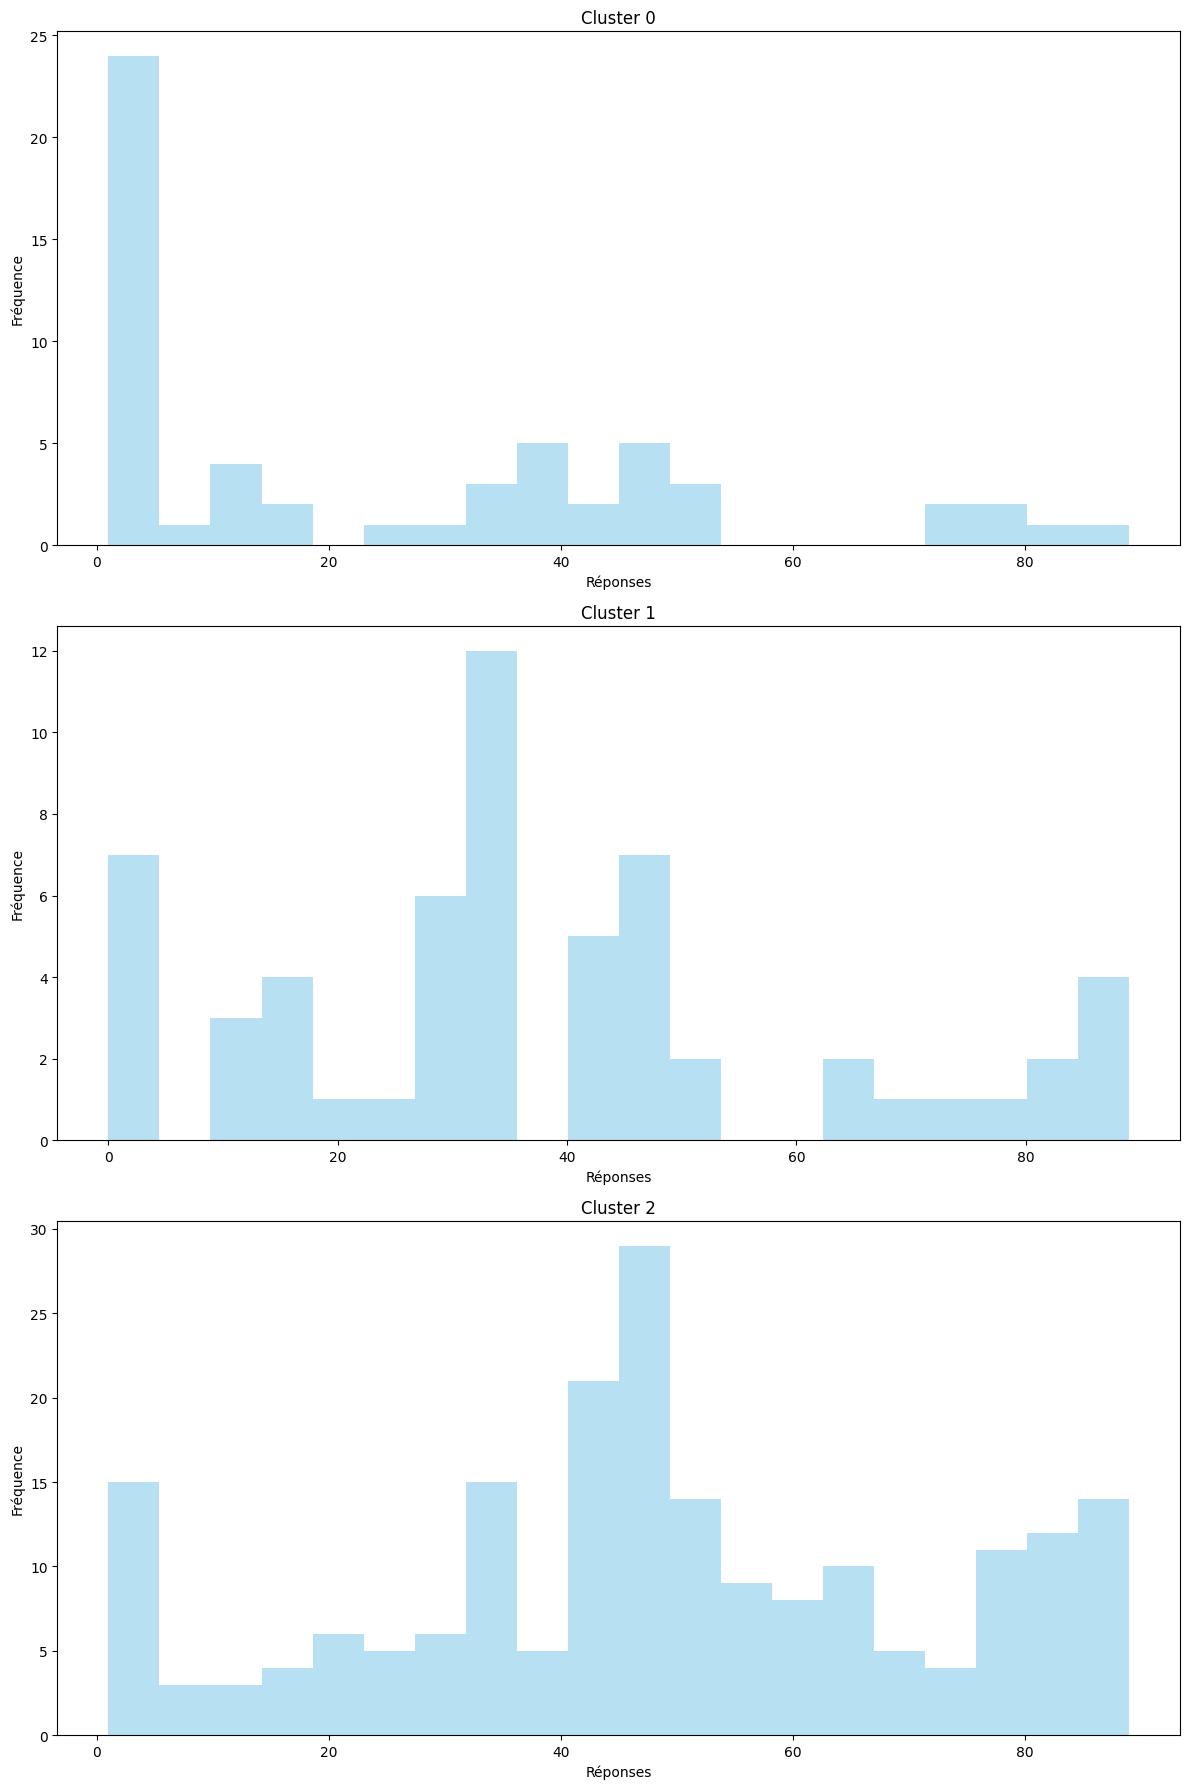

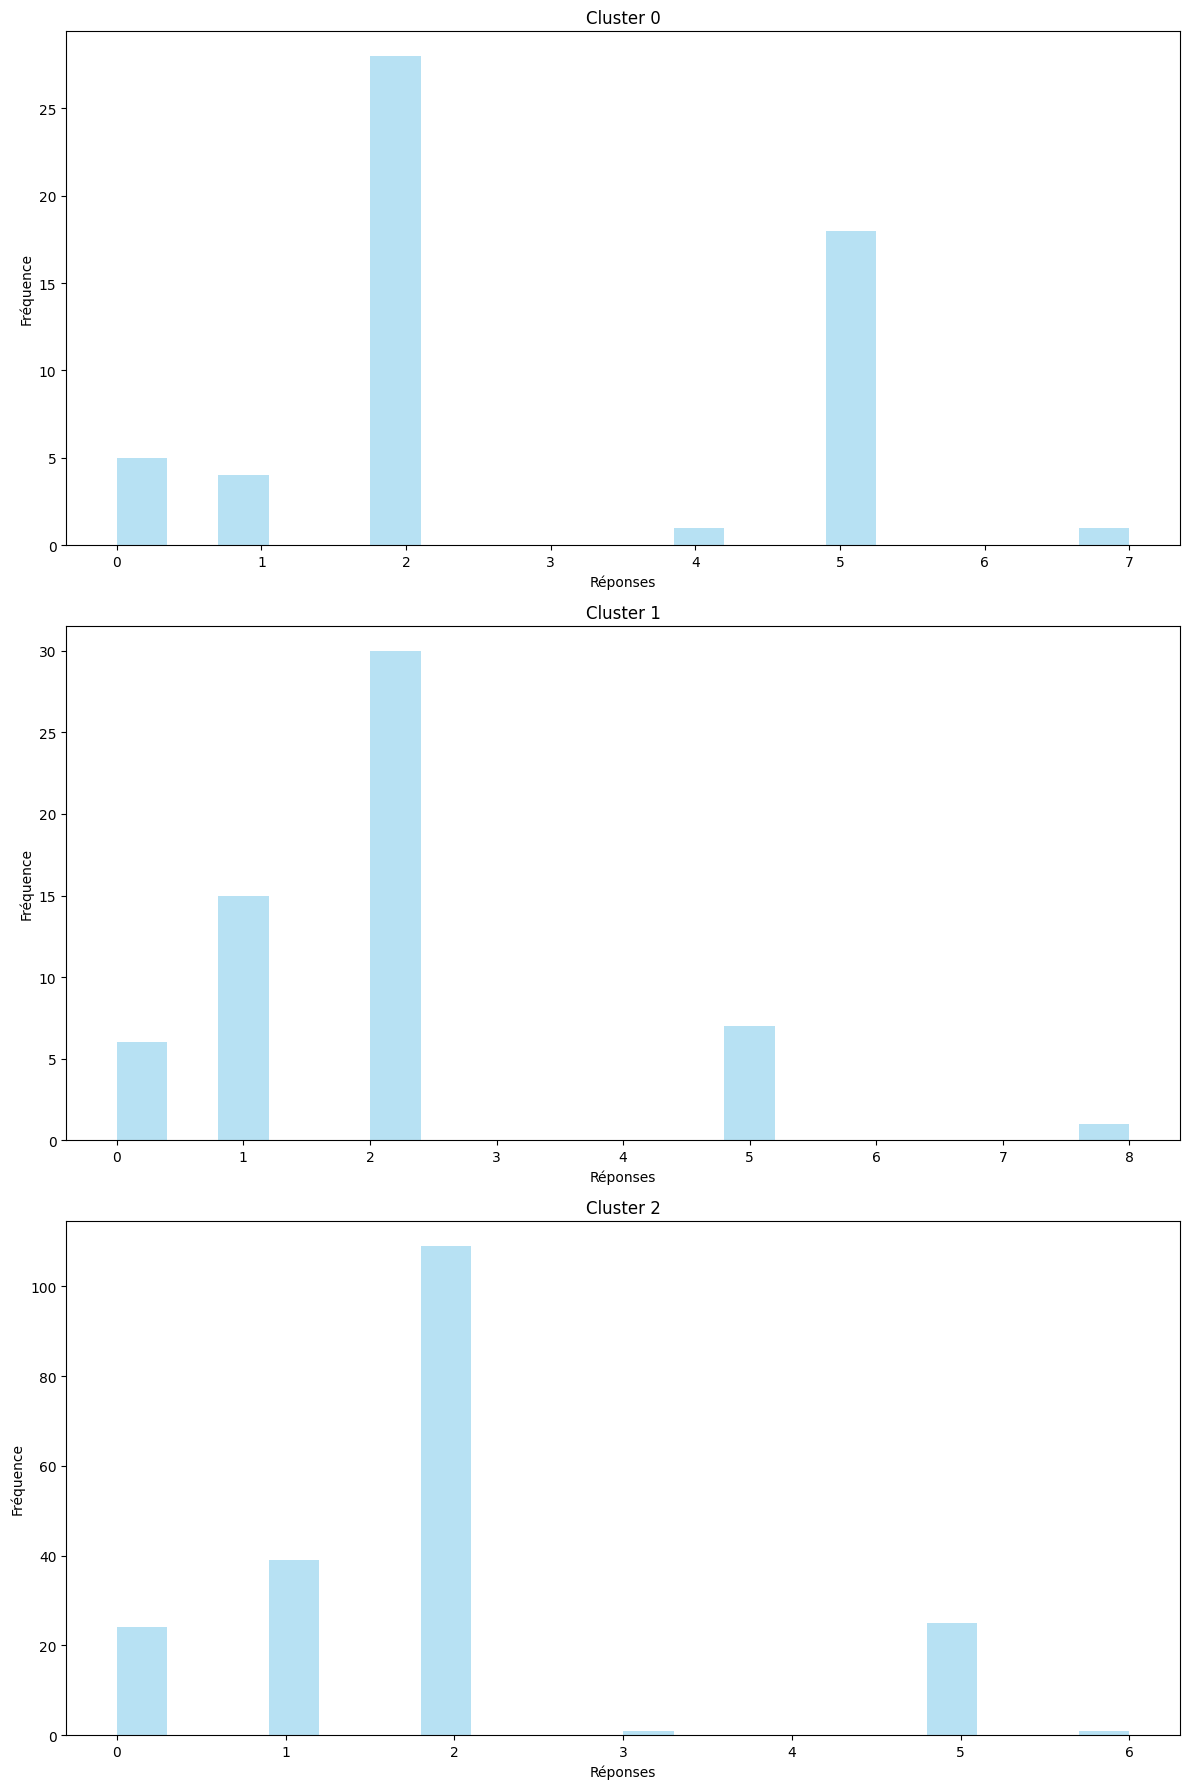

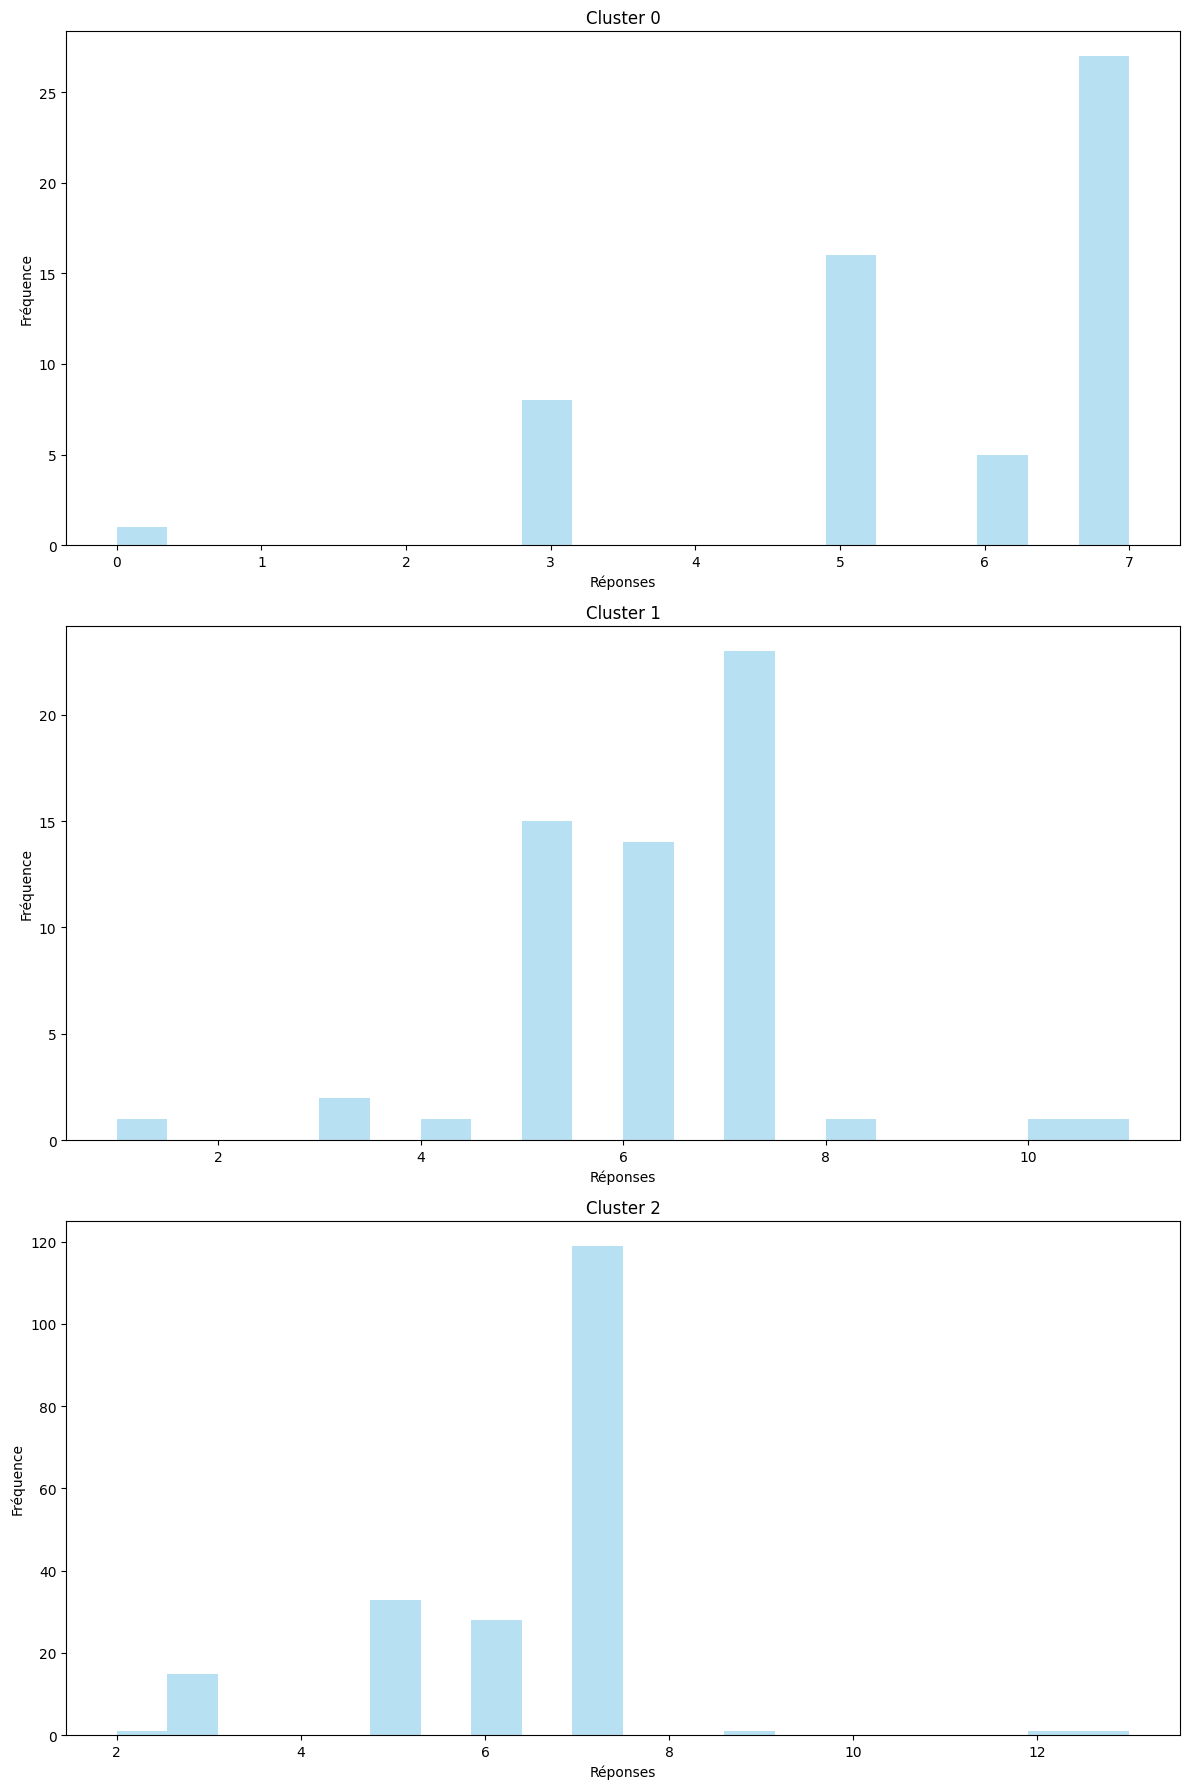

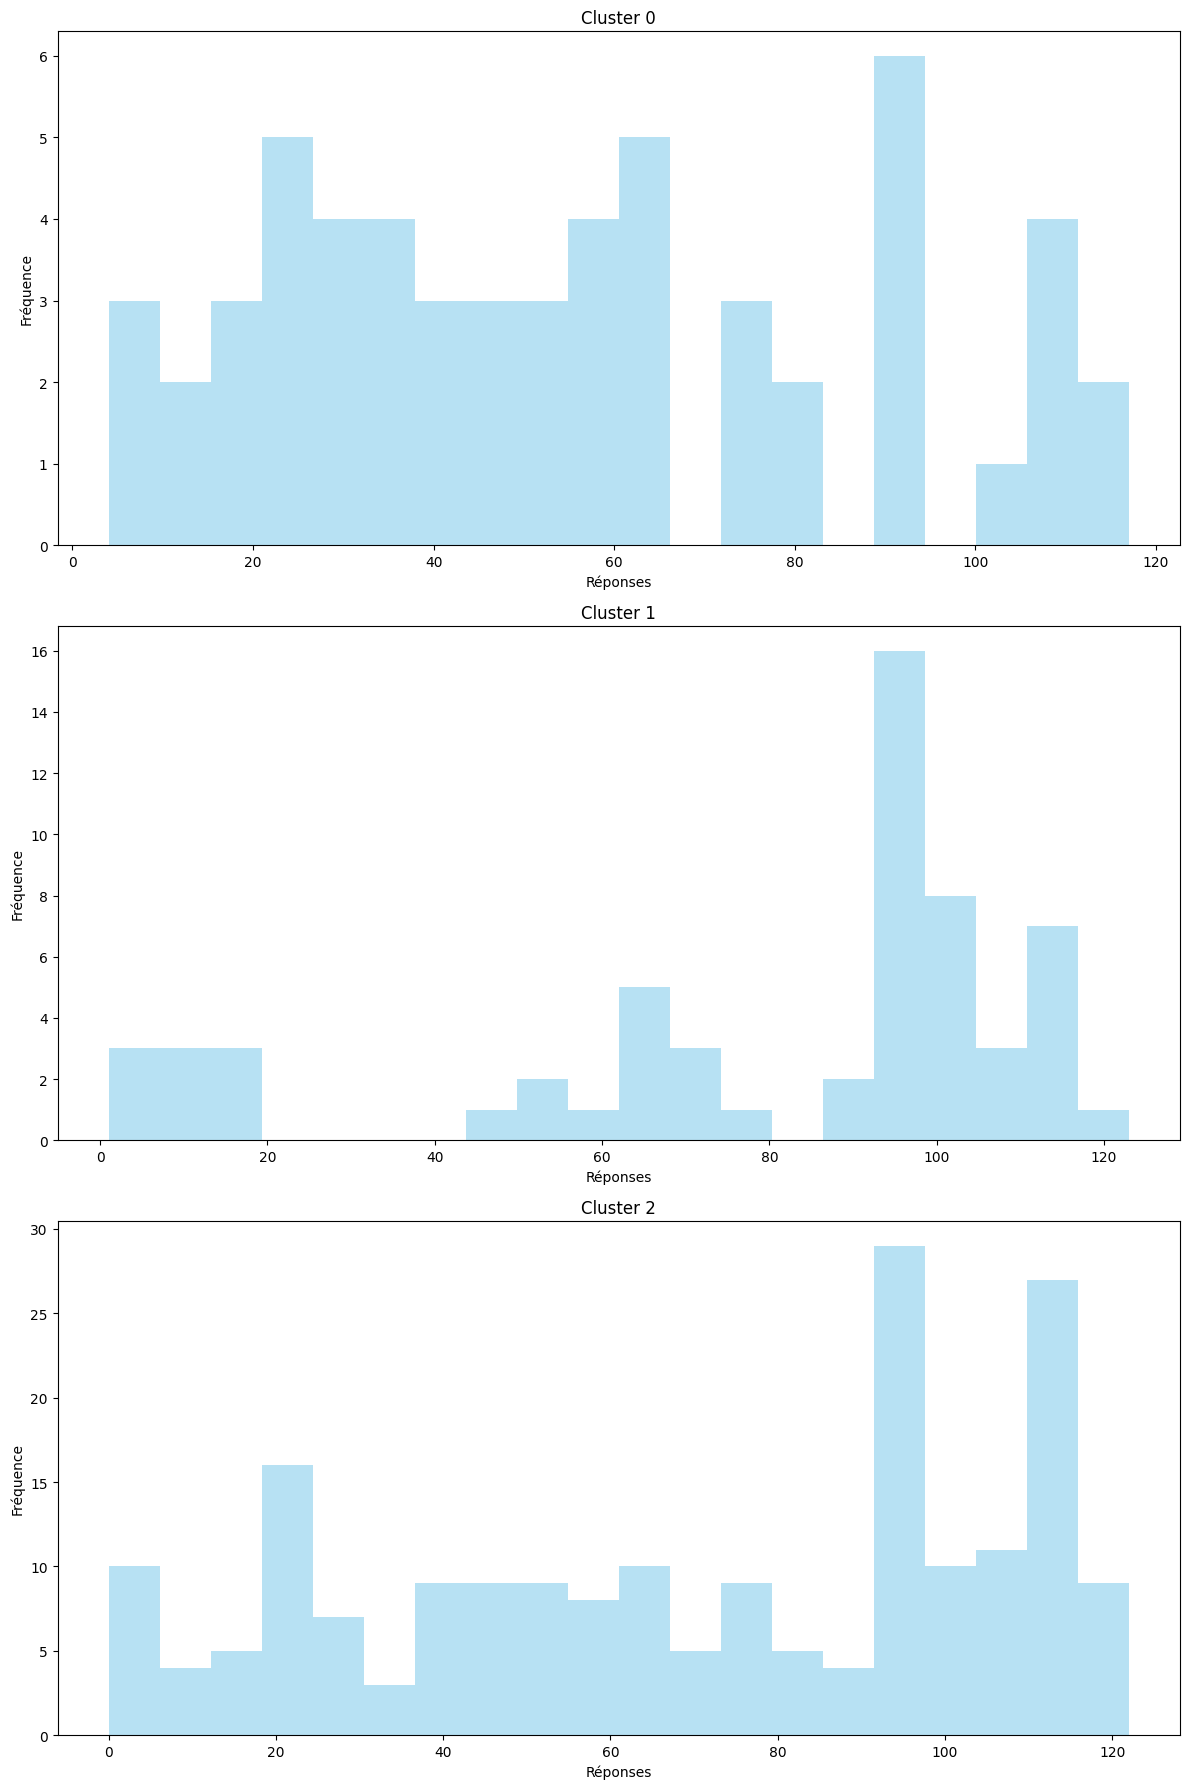

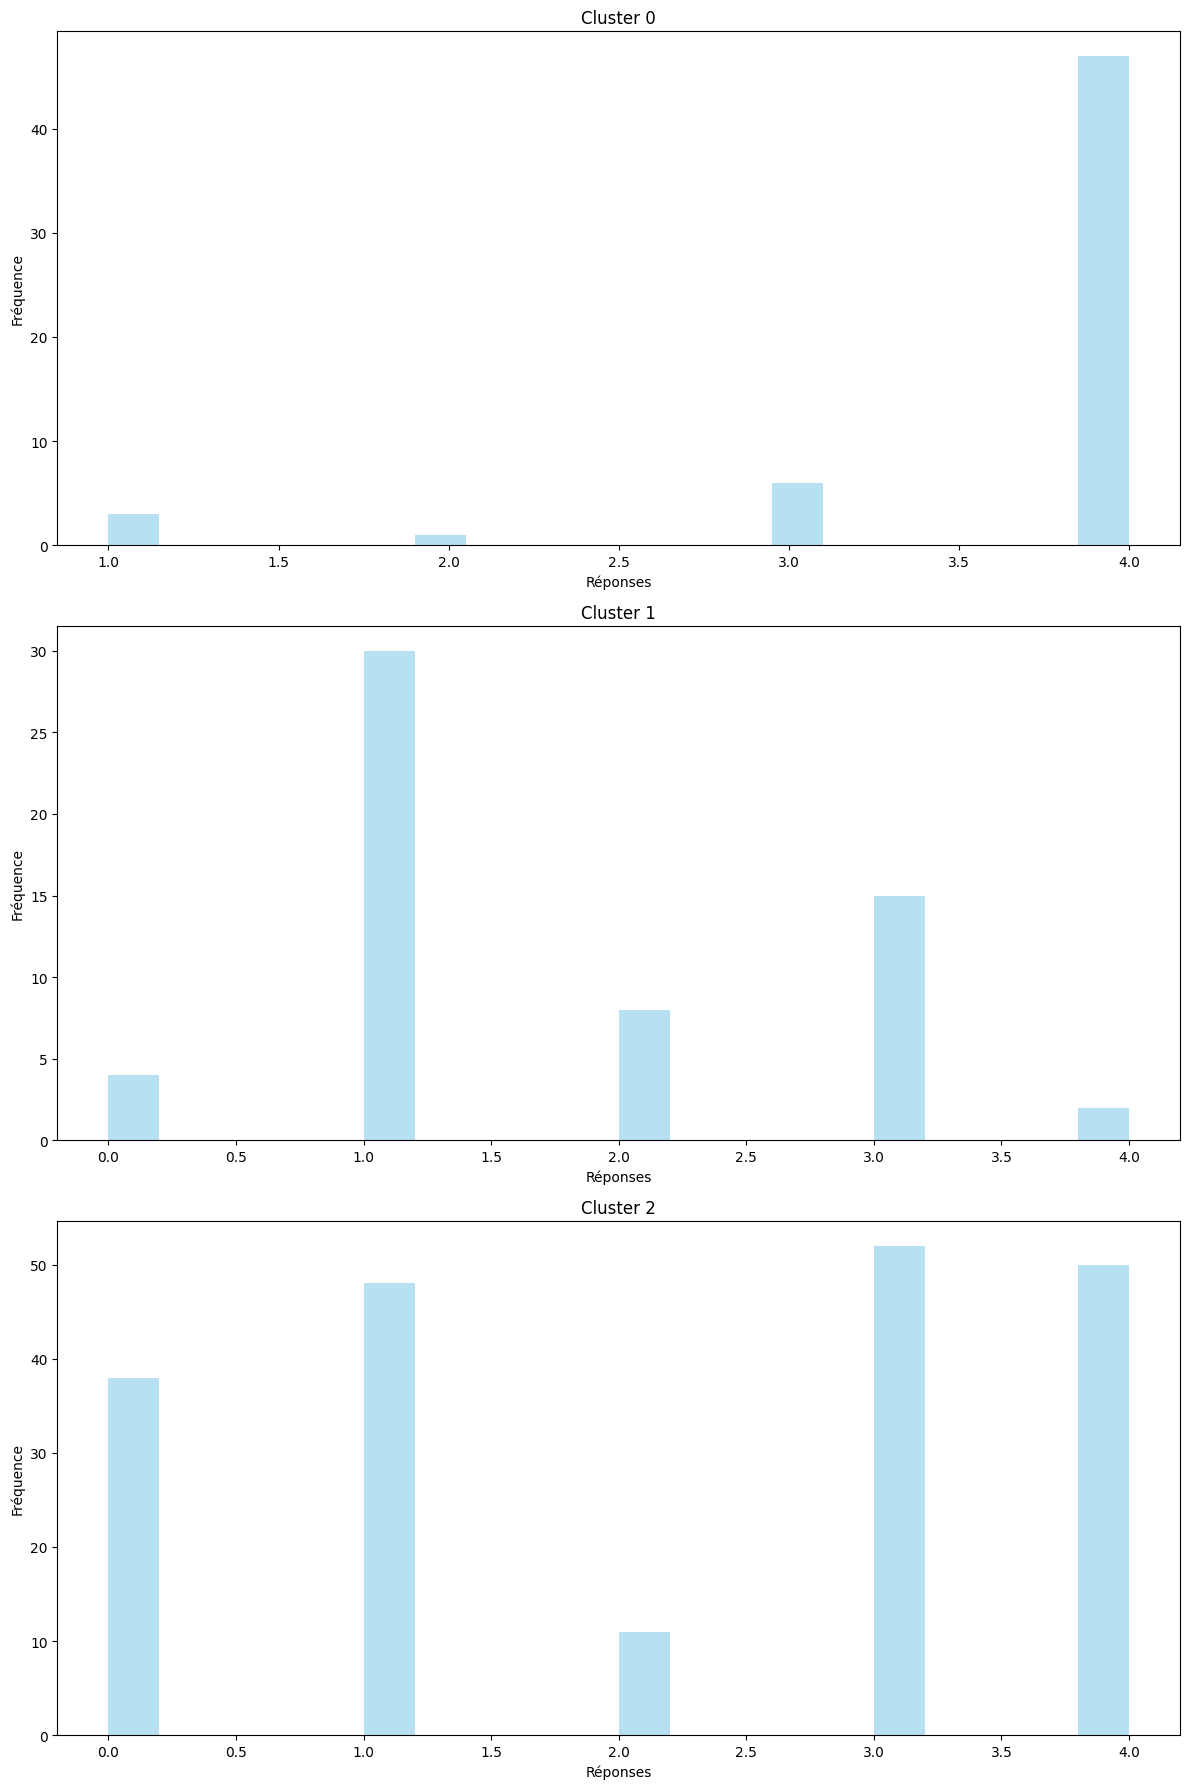

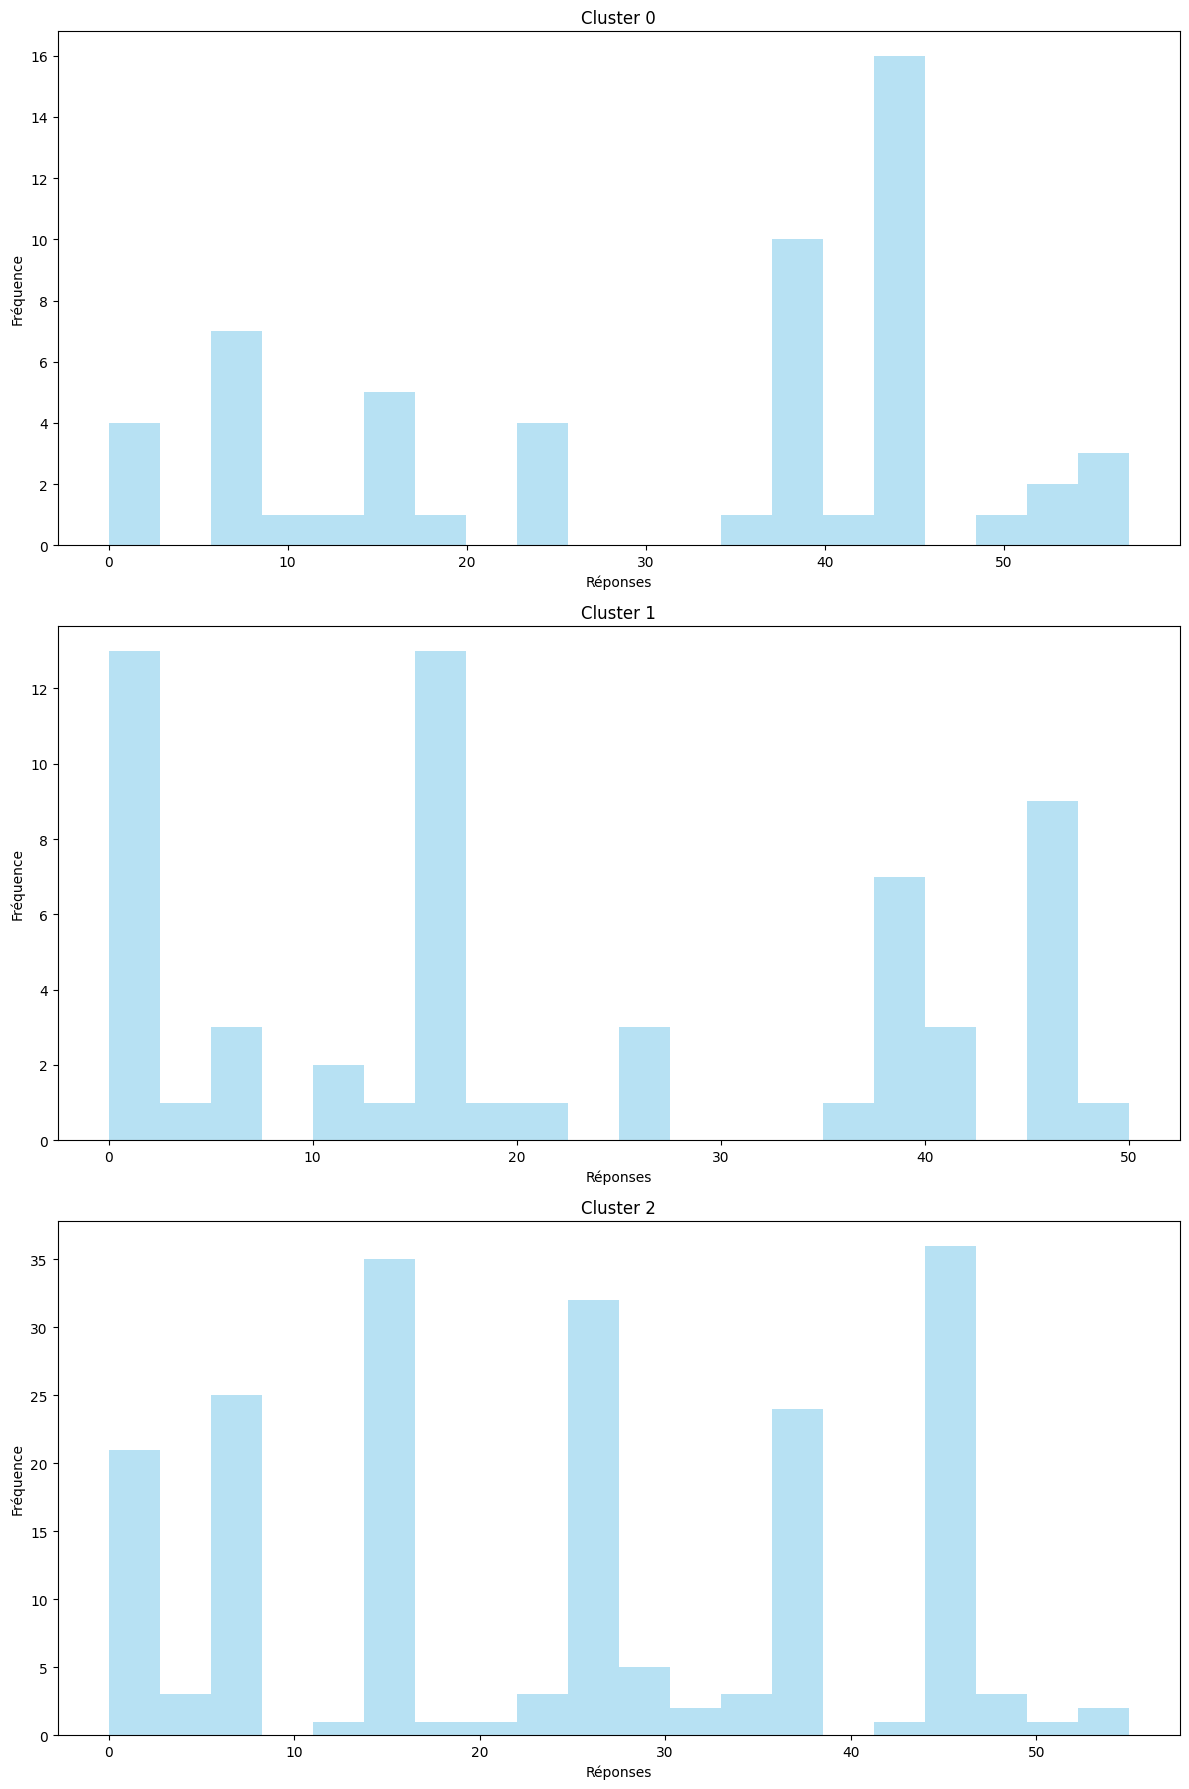

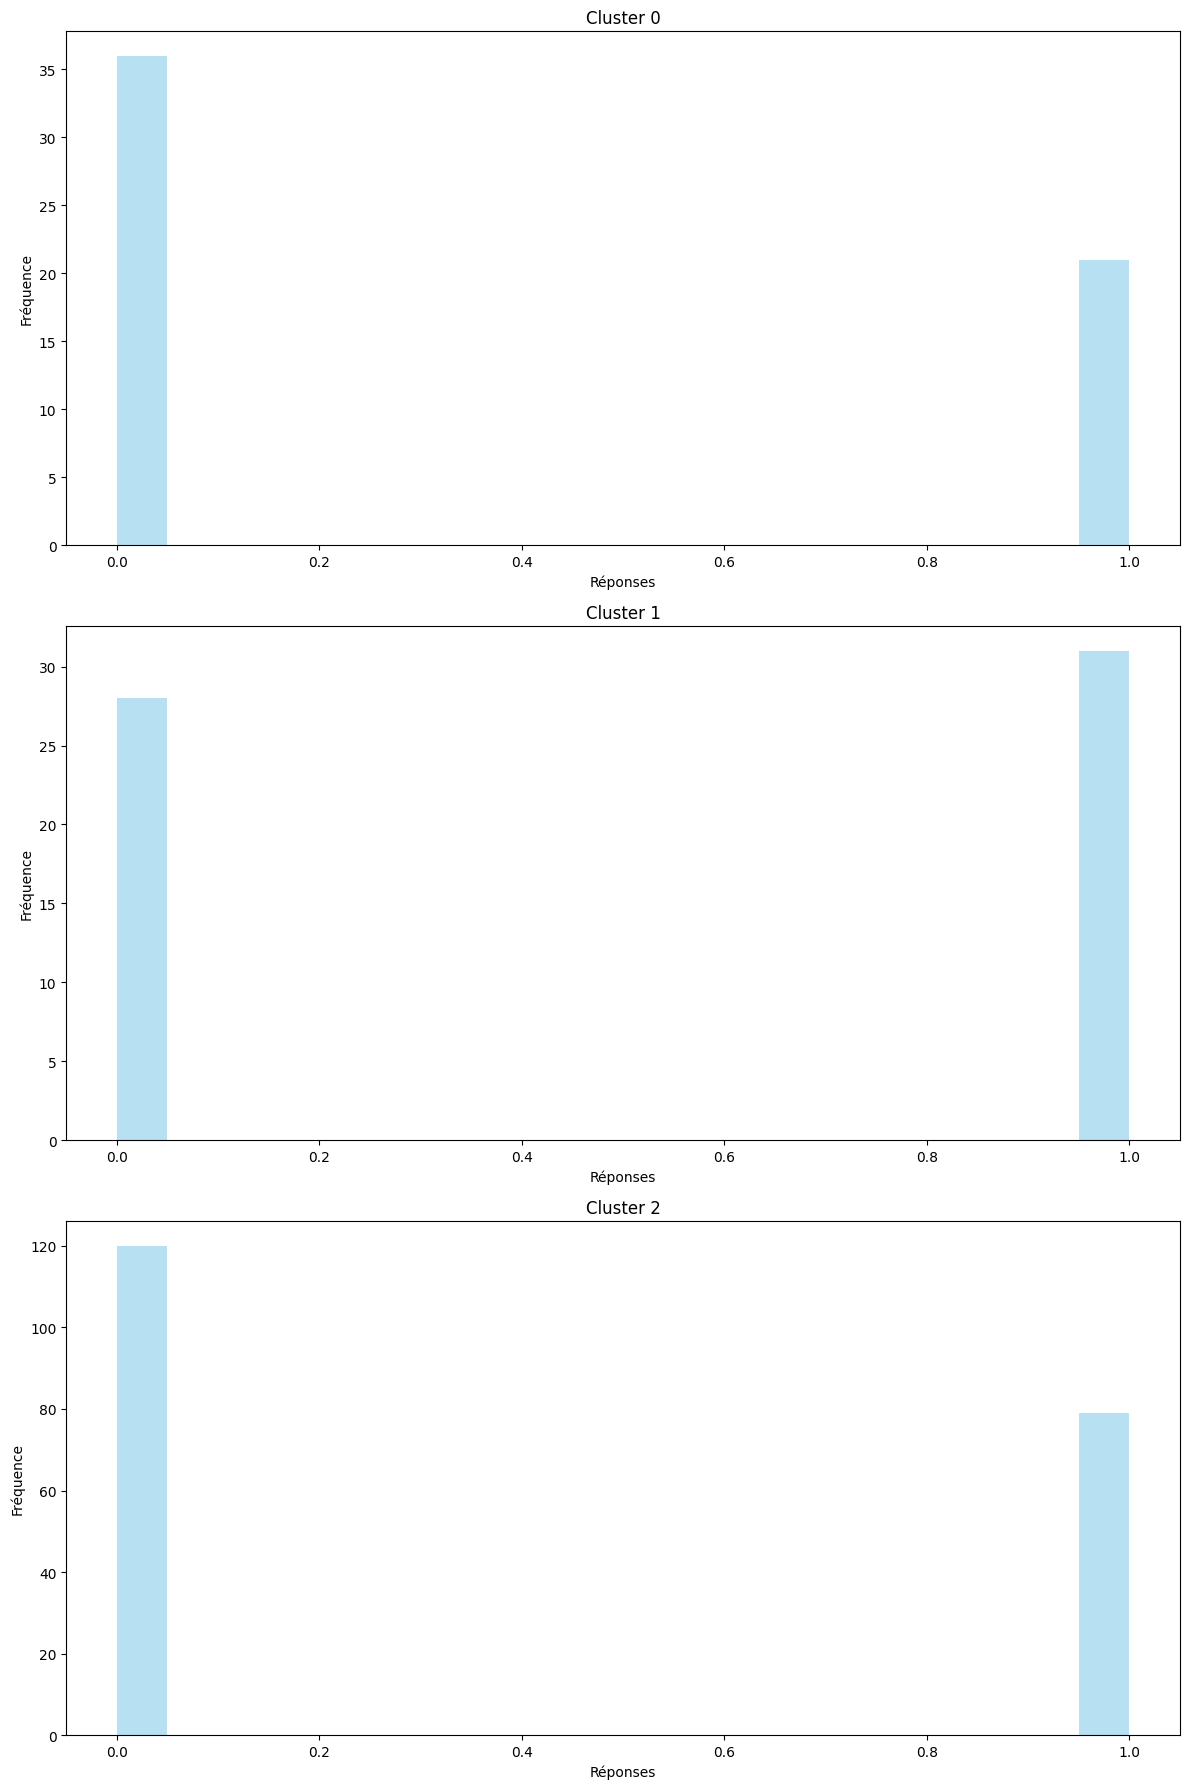

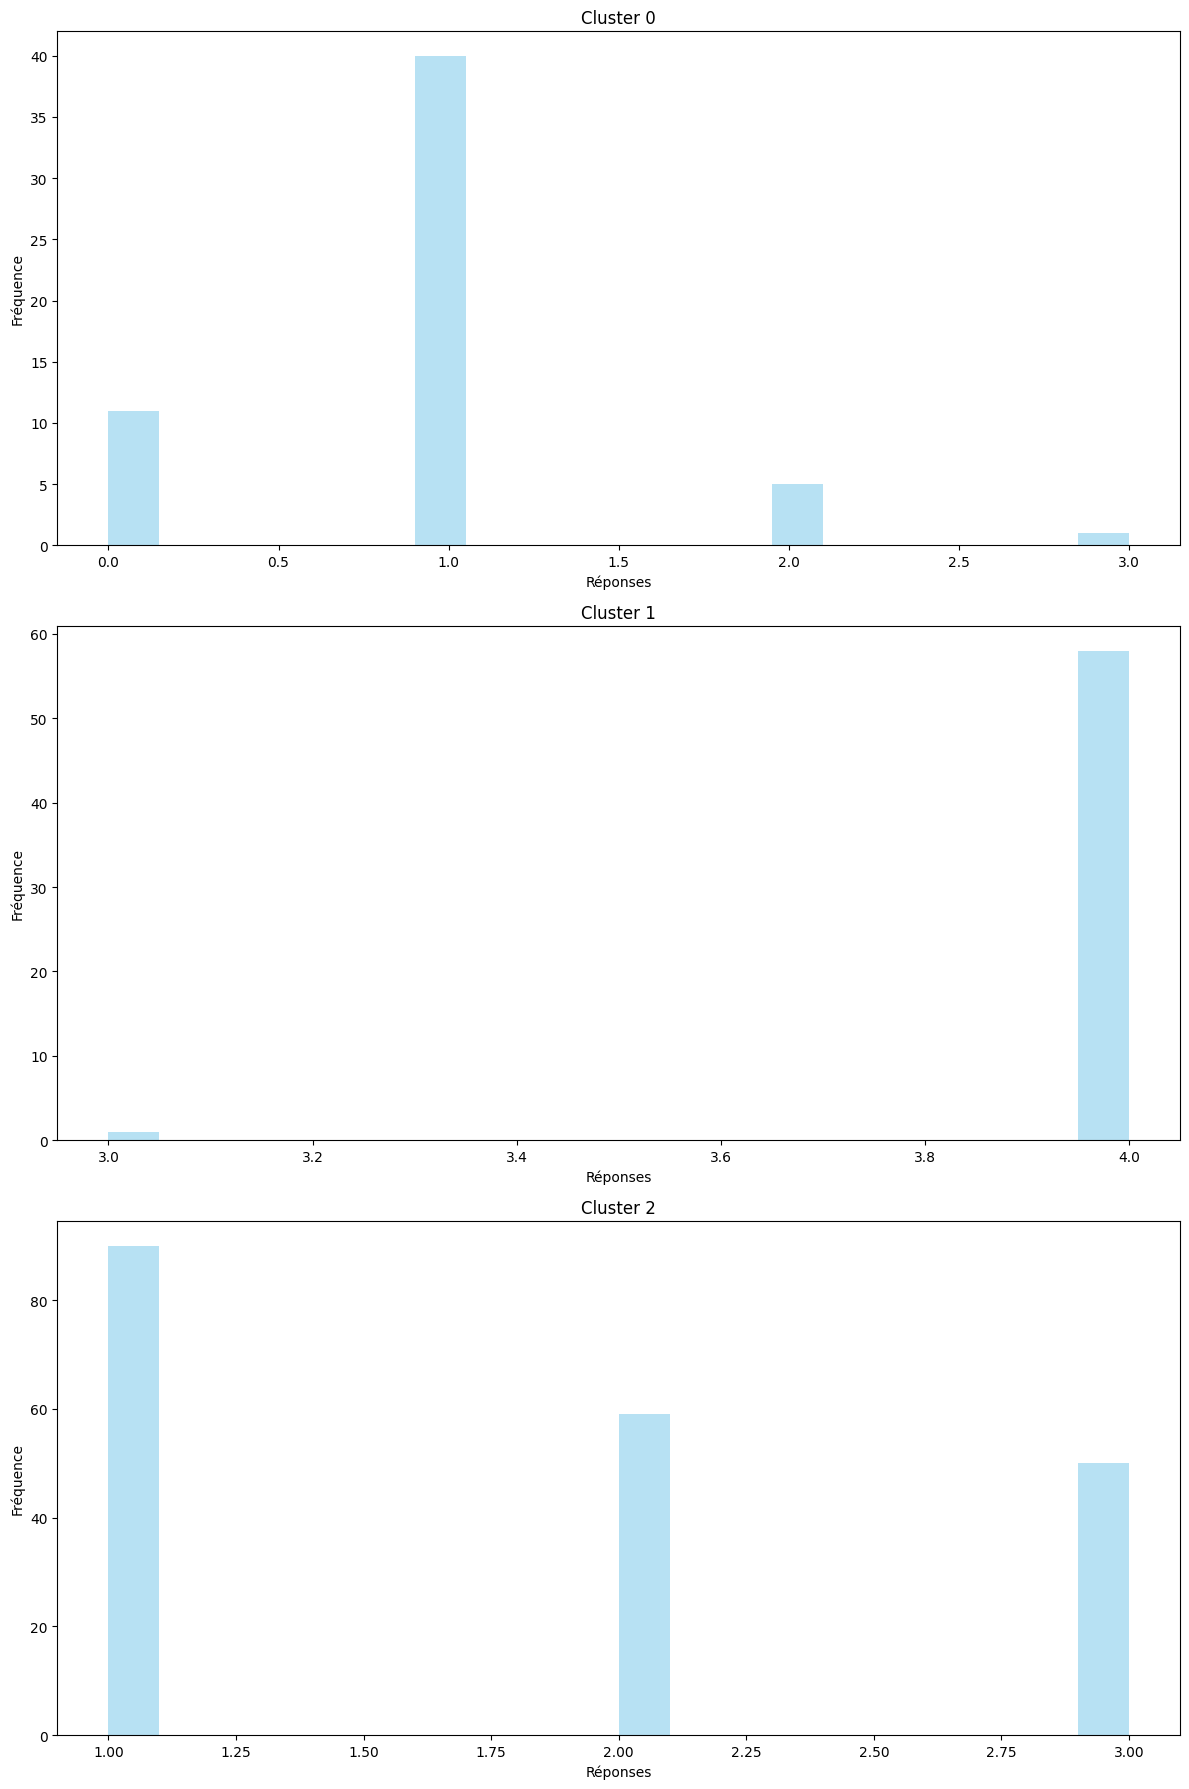

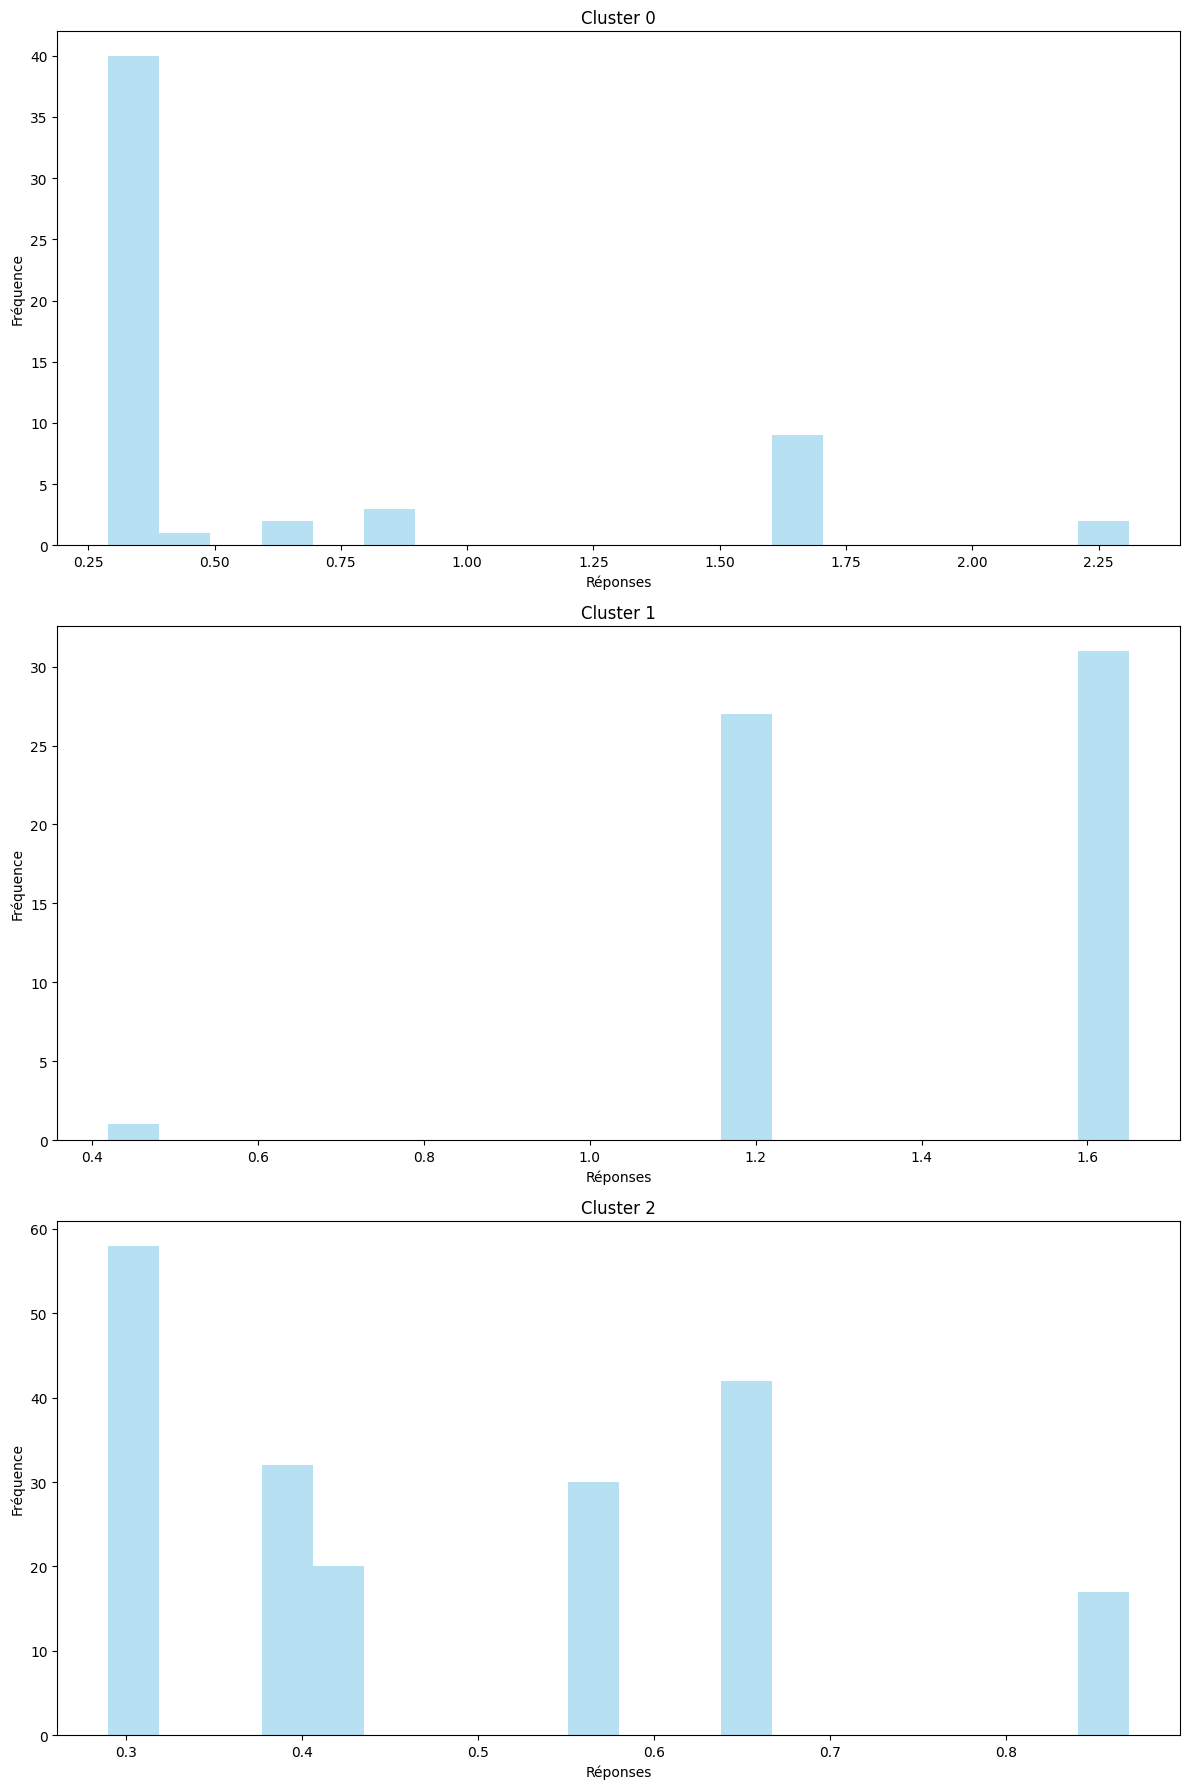

In [ ]:
# Tracer les histogrammes pour chaque question dans chaque cluster K-means
for question in df.columns:
    plot_question_distribution(df, question, kmeans_labels)

In [ ]:
# Fonction pour tracer un histogramme pour une question spécifique et chaque cluster
def plot_question_distribution(data, question, cluster_labels):
    unique_clusters = sorted(set(cluster_labels))
    num_clusters = len(unique_clusters)

    fig, axs = plt.subplots(1, num_clusters, figsize=(6*num_clusters, 6))

    for i, cluster in enumerate(unique_clusters):
        axs[i].hist(data[cluster_labels == cluster][question], bins=20, color='skyblue', alpha=0.6)
        axs[i].set_title(f'Cluster {cluster}')
        axs[i].set_xlabel('Réponses')
        axs[i].set_ylabel('Fréquence')

    plt.tight_layout()
    plt.show()

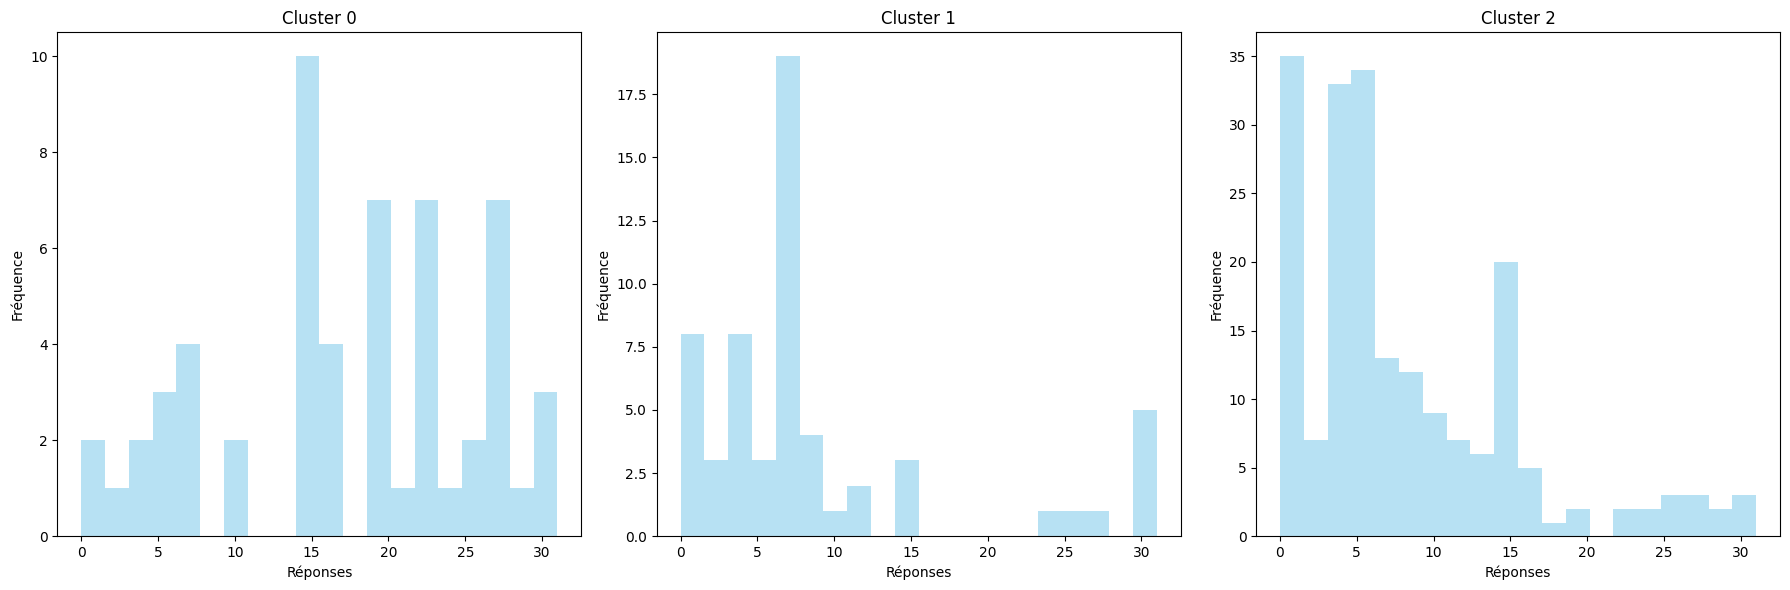

In [ ]:
# Tracer les histogrammes pour chaque cluster K-means
plot_question_distribution(df, 'Q1', kmeans_labels)

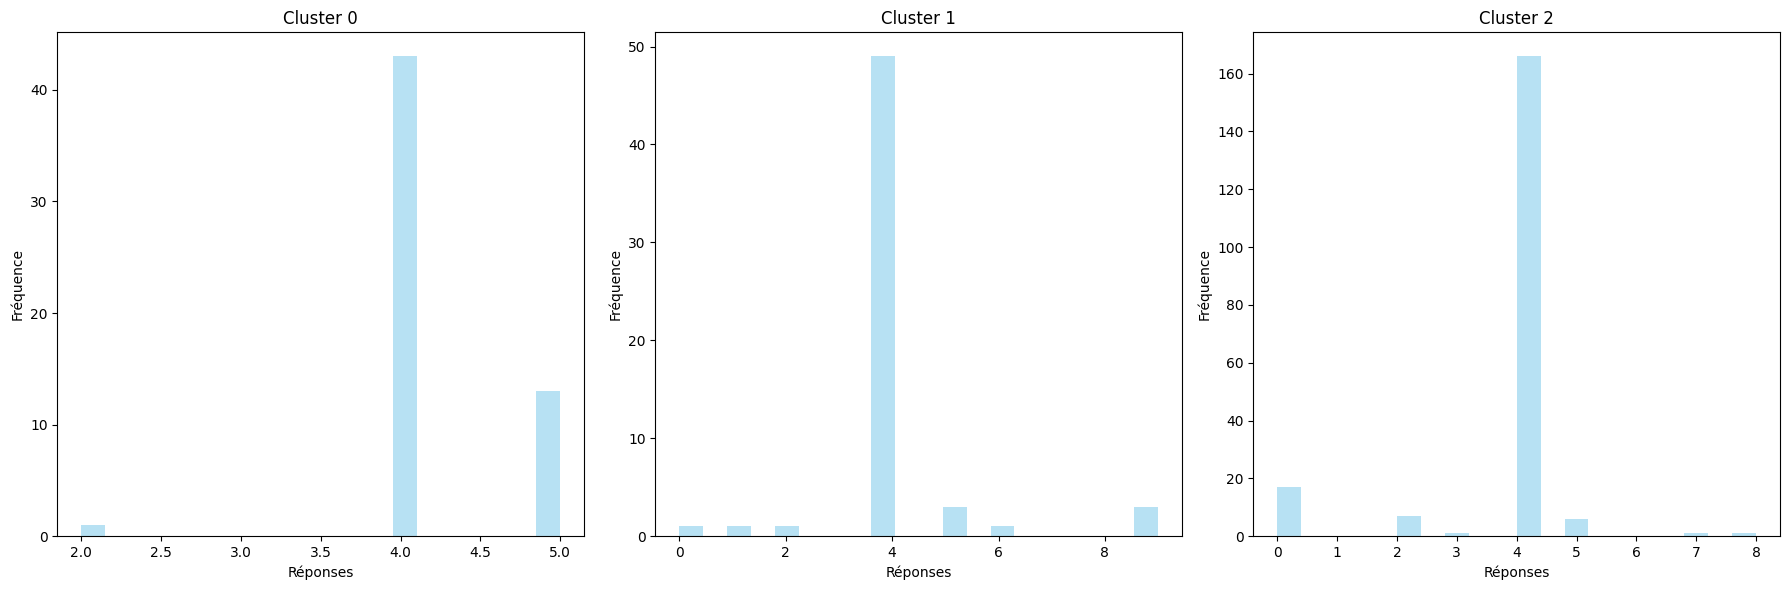

In [ ]:
# Tracer les histogrammes pour chaque cluster K-means
plot_question_distribution(df, 'Q3', kmeans_labels)

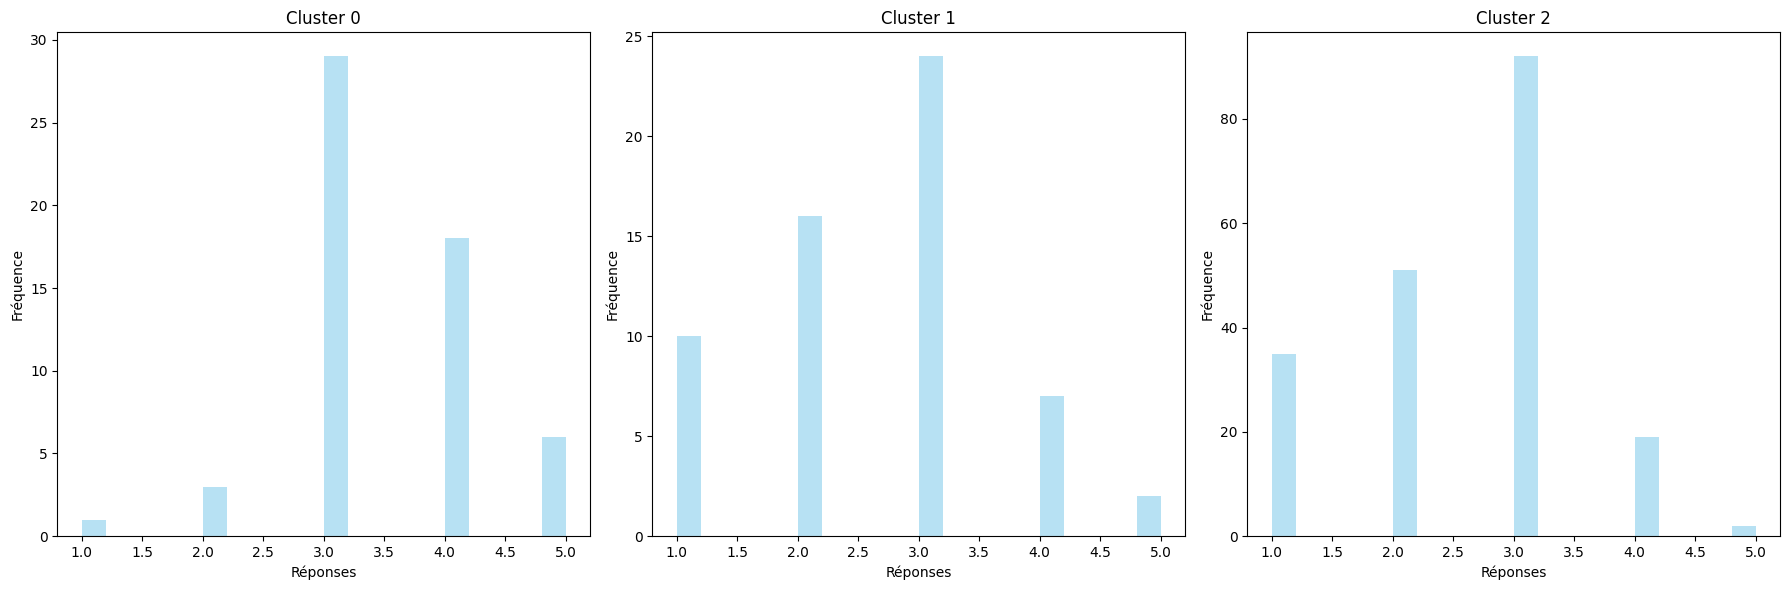

In [ ]:
# Tracer les histogrammes pour chaque cluster K-means
plot_question_distribution(df, 'Q2', kmeans_labels)

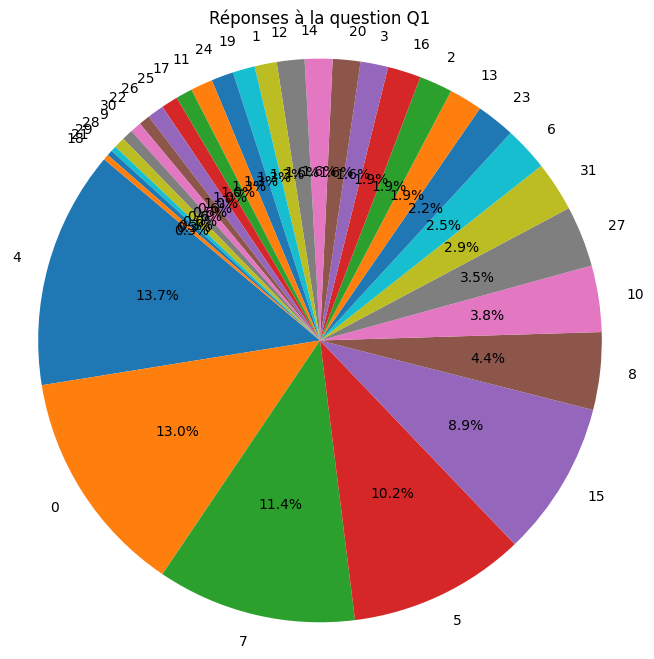

In [ ]:
# Fonction pour tracer un pie chart pour une question donnée sur toutes les données
def plot_pie_chart_for_all_data(data, question):
    # Compter les réponses pour la question spécifiée
    question_data = data[question].value_counts()
    labels = question_data.index
    sizes = question_data.values

    # Créer le graphique en secteurs
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Réponses à la question {question}')
    plt.axis('equal')
    plt.show()

# Exemple d'utilisation avec une question spécifique
plot_pie_chart_for_all_data(df, 'Q1')

In [ ]:
# Tracer le pie chart pour le cluster 0 et la question 3 pour K-means
plot_pie_chart(df, 'Q12', kmeans_labels, 1)

In [ ]:
# Tracer le pie chart pour le cluster 0 et la question 3 pour K-means
plot_pie_chart(df, 'Q12', kmeans_labels, 2)

In [ ]:
# Tracer le pie chart pour le cluster 0 et la question 13 pour K-means
plot_pie_chart(df, 'Q13', kmeans_labels, 0)

In [ ]:
# Tracer le pie chart pour le cluster 1 et la question 13 pour K-means
plot_pie_chart(df, 'Q13', kmeans_labels, 1)

In [ ]:
# Tracer le pie chart pour le cluster 2 et la question 13 pour K-means
plot_pie_chart(df, 'Q13', kmeans_labels, 2)

In [ ]:
# Tracer le pie chart pour le cluster 0 et la question 3 pour K-means
plot_pie_chart(df, 'Q2', kmeans_labels, 0)

In [ ]:
# Tracer le pie chart pour le cluster 0 et la question 3 pour K-means
plot_pie_chart(df, 'Q3', kmeans_labels, 1)

In [ ]:
# Tracer le pie chart pour le cluster 0 et la question 3 pour K-means
plot_pie_chart(df, 'Q10', kmeans_labels, 2)

In [ ]:
# Exporting cluster data to CSV files
for cluster_num in range(3):
    cluster_data = df[kmeans_labels == 0]
    cluster_data.to_csv(f'cluster_{0}_data.csv', index=False)

In [ ]:
# Exporting cluster data to CSV files
for cluster_num in range(3):
    cluster_data = df[kmeans_labels == 1]
    cluster_data.to_csv(f'cluster_{1}_data.csv', index=False)

In [ ]:
# Exporting cluster data to CSV files
for cluster_num in range(3):
    cluster_data = df[kmeans_labels == 2]
    cluster_data.to_csv(f'cluster_{2}_data.csv', index=False)

In [ ]:
for column, encoder in label_encoders.items():
    print(f"Encoding for column '{column}':")
    for label, encoded_value in enumerate(encoder.classes_):
        print(f"{label} equivalent to '{encoded_value}'")

In [ ]:
# Afficher les mappages d'encodage sous forme de texte
for column, encoder in label_encoders.items():
    print(f"Encoding for column '{column}':")
    for encoded_value, original_value in enumerate(encoder.classes_):
        print(f"  {encoded_value} -> '{original_value}'")
    print()

In [ ]:
# Filter the data for Cluster 0
cluster_0_data = df[kmeans_labels == 0]

# Plot question 7
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Q1', data=cluster_0_data)
plt.title('Question 1 - Bar Plot')

plt.subplot(1, 2, 2)
sns.boxplot(x='Q1', data=cluster_0_data)
plt.title('Question 1 - Box Plot')

plt.tight_layout()
plt.show()

# Plot question 8
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Q1', data=cluster_0_data)
plt.title('Question 1 - Bar Plot')

plt.subplot(1, 2, 2)
sns.boxplot(x='Q1', data=cluster_0_data)
plt.title('Question 1 - Box Plot')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Filter the data for Cluster 0
cluster_0_data = df[kmeans_labels == 0]

# Extract Q1 data from Cluster 0
q1_data_cluster_0 = cluster_0_data['Q1'].values

# Prepare the figure and axis
fig, ax = plt.subplots()
bar = ax.bar(range(len(q1_data_cluster_0)), q1_data_cluster_0)

# Function to update the bar chart
def update(num):
    ax.clear()
    ax.bar(range(num + 1), q1_data_cluster_0[:num + 1], color='skyblue')
    ax.set_title(f"Cluster 0, Q1 - Up to Response {num + 1}")
    ax.set_xlabel('Response Index')
    ax.set_ylabel('Q1 Value')
    ax.set_ylim(0, max(q1_data_cluster_0) + 5)

# Create the animation
ani = FuncAnimation(fig, update, frames=range(len(q1_data_cluster_0)), repeat=False)

# Display the animation
plt.show()

In [ ]:
# Calculate the size of each cluster for K-means
kmeans_cluster_sizes = pd.Series(kmeans_labels).value_counts()
print("K-means Cluster Sizes:")
print(kmeans_cluster_sizes)

In [ ]:
# Filter the data for Cluster 0
cluster_2_data = df[kmeans_labels == 2]

# Count the responses for Question 13
question_12_counts = cluster_2_data['Q12'].value_counts()

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(question_12_counts, labels=question_12_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title('Gender - Cluster 1')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Add cluster labels to the original data
original_df['Cluster'] = kmeans_labels

# Save each cluster's data to a separate CSV file
for cluster_num in range(optimal_clusters):
    cluster_data = original_df[original_df['Cluster'] == cluster_num]
    cluster_data.to_csv(f'cluster_{cluster_num}_data.csv', index=False)

print("Data for each cluster has been successfully saved to CSV files.")